---
#  🧑‍💻 Predictive Analytics for Employee Attrition and Retention 🧑‍💻



---
📝 Problem Statement 📝
---
Background: You are provided with a dataset that includes HR data for an organization. Your task is to analyze the data to provide insights into employee retention, satisfaction, and performance, and to build predictive models where applicable.

---
📌 Key Business Questions to Explore:
---
1.   What are the key drivers of employee attrition in the company? Provide data-driven suggestions on how to reduce attrition
2.   Are there any disparities in salary based on Department, Gender, or Performance_Score? What steps can HR take to ensure fair compensation?
3.   How does work-life balance impact job satisfaction and performance? Use
data to support your conclusions.



In [ ]:
import pandas as pd
!pip install -q hvplot
import hvplot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [ ]:
df=pd.read_excel('HRTestData.xlsx')

In [ ]:
df

,S.No,Employee_ID,Age,Gender,Department,Tenure,Satisfaction_Score,Performance_Score,Salary,Attrition,Promotion_Last_3_Years,Work_Life_Balance,Overtime
0,0,1,30.00,Male,Engineering,NaN,8.00,2,92000.00,0,1,3,0
1,1,2,57.00,Female,Sales,14.30,6.00,2,54000.00,0,0,5,1
2,2,3,43.00,Male,Marketing,9.40,3.00,4,88000.00,0,0,3,0
3,3,4,47.00,Female,Marketing,0.50,1.00,1,106000.00,0,1,5,1
4,4,5,33.00,Male,Engineering,13.50,2.00,1,66000.00,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,29.00,Male,Sales,2.20,5.00,1,32000.00,0,0,2,1
1996,1996,1997,29.00,Male,Engineering,3.80,6.00,1,36000.00,0,0,5,0
1997,1997,1998,27.00,Female,HR,5.60,3.00,4,96000.00,1,0,5,0
1998,1998,1999,NaN,Male,Sales,11.50,4.00,2,59000.00,0,0,3,1


In [ ]:
df['Attrition']=df['Attrition'].map({1:'Yes',0:'No'})
df['Overtime']=df['Overtime'].map({1:'Yes',0:'No'})
df['Promotion_Last_3_Years']=df['Promotion_Last_3_Years'].map({1:'Yes',0:'No'})

In [ ]:
df

,S.No,Employee_ID,Age,Gender,Department,Tenure,Satisfaction_Score,Performance_Score,Salary,Attrition,Promotion_Last_3_Years,Work_Life_Balance,Overtime
0,0,1,30.00,Male,Engineering,NaN,8.00,2,92000.00,No,Yes,3,No
1,1,2,57.00,Female,Sales,14.30,6.00,2,54000.00,No,No,5,Yes
2,2,3,43.00,Male,Marketing,9.40,3.00,4,88000.00,No,No,3,No
3,3,4,47.00,Female,Marketing,0.50,1.00,1,106000.00,No,Yes,5,Yes
4,4,5,33.00,Male,Engineering,13.50,2.00,1,66000.00,No,No,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,29.00,Male,Sales,2.20,5.00,1,32000.00,No,No,2,Yes
1996,1996,1997,29.00,Male,Engineering,3.80,6.00,1,36000.00,No,No,5,No
1997,1997,1998,27.00,Female,HR,5.60,3.00,4,96000.00,Yes,No,5,No
1998,1998,1999,NaN,Male,Sales,11.50,4.00,2,59000.00,No,No,3,Yes


In [ ]:
df = df.drop(["S.No", "Employee_ID"], axis=1)

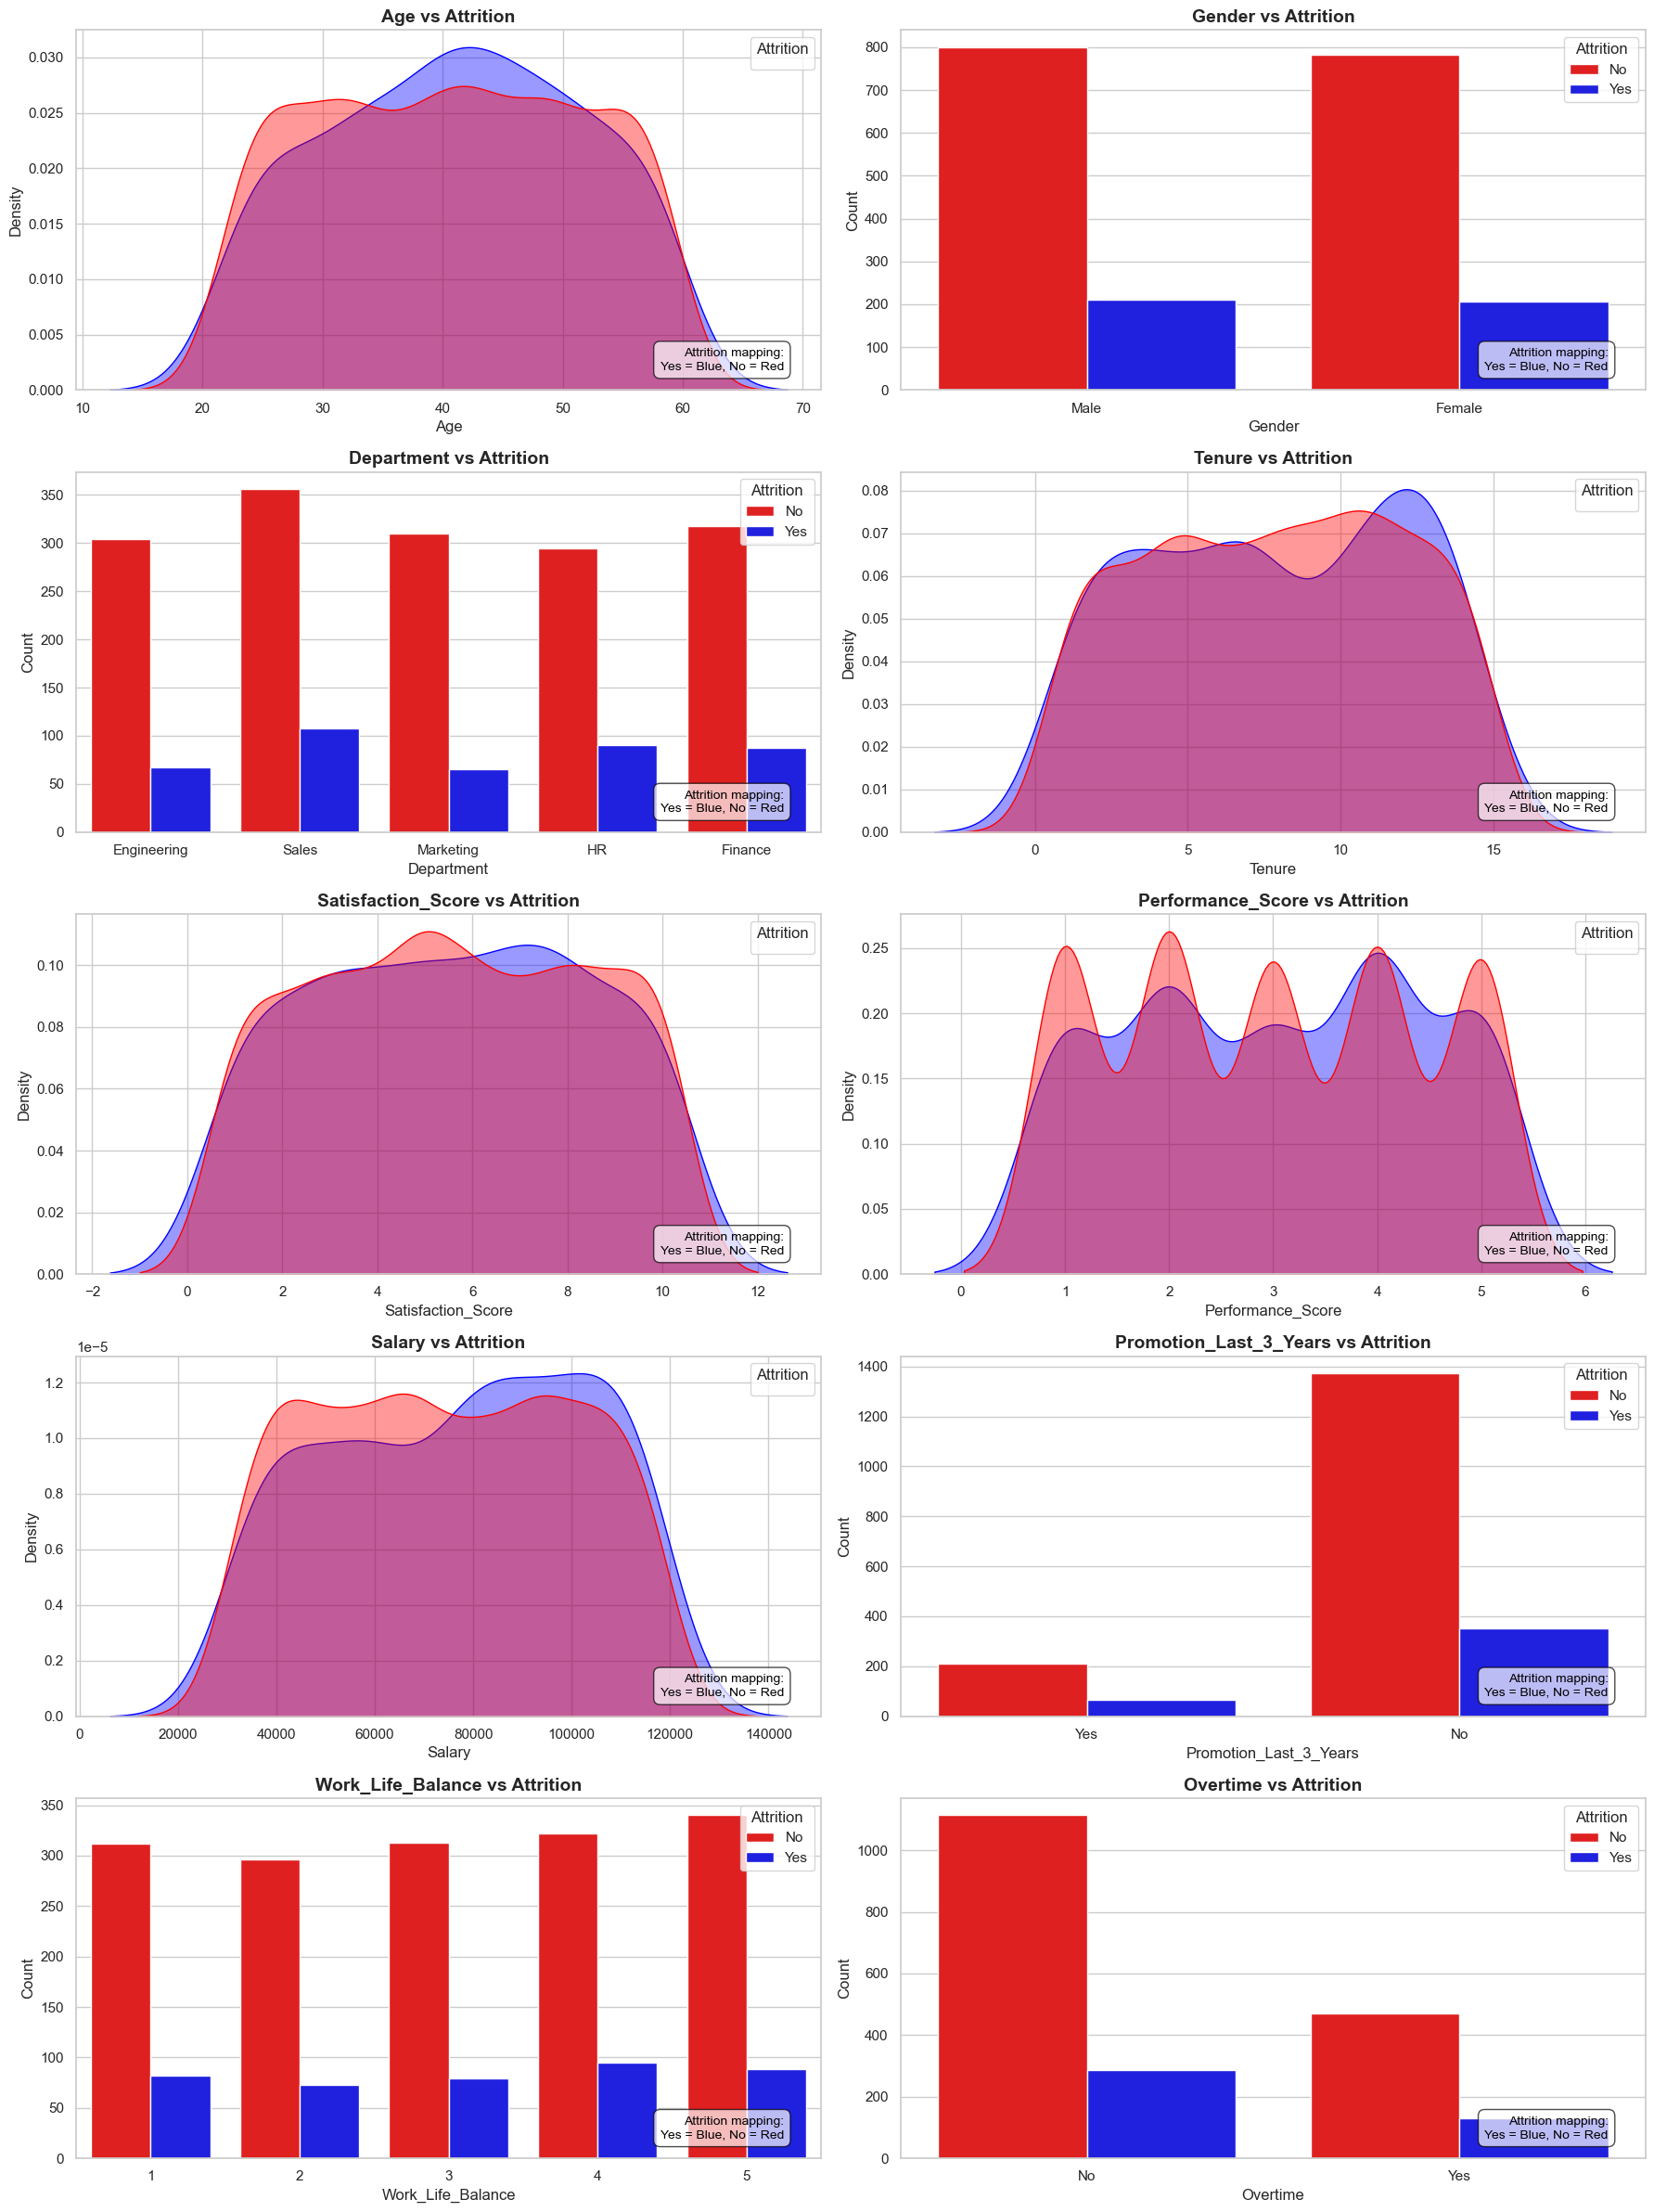

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot style and figure size
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 2, figsize=(18, 24))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase spacing between subplots

# List of features
features = ['Age', 'Gender', 'Department', 'Tenure', 'Satisfaction_Score',
            'Performance_Score', 'Salary', 'Promotion_Last_3_Years',
            'Work_Life_Balance', 'Overtime']

# Custom palette for Attrition categories (assuming 'Yes' and 'No' as categories)
attrition_palette = {'Yes': "blue", 'No': "red"}

# Loop through each feature and corresponding subplot
for i, feature in enumerate(features):
    row, col = divmod(i, 2)  # Calculate row and column index
    ax = axes[row, col]

    # Plot different charts based on feature type
    if feature in ['Gender', 'Department', 'Promotion_Last_3_Years', 'Work_Life_Balance', 'Overtime']:
        # Categorical feature with countplot
        sns.countplot(data=df, x=feature, hue='Attrition', ax=ax, palette=attrition_palette)
        ax.set_ylabel("Count")
    else:
        # Continuous feature with kdeplot
        # Define the KDE plot with a custom palette and manual legend
        sns.kdeplot(data=df, x=feature, hue='Attrition', common_norm=False, fill=True, alpha=0.4, ax=ax, palette=attrition_palette)
        ax.set_ylabel("Density")

    # Customize each subplot
    ax.set_title(f'{feature} vs Attrition', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature, fontsize=12)

    # Ensure that the legend clearly corresponds to the 'Attrition' categories
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title="Attrition", loc="upper right")

    # Add a note on the plot for the color mapping
    note = "Attrition mapping:\nYes = Blue, No = Red"
    ax.text(0.95, 0.05, note, ha='right', va='bottom', transform=ax.transAxes, fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))

# Adjust the layout to improve spacing and title visibility
plt.tight_layout()
plt.show()

---
📊 Task 1: Exploratory Data Analysis (EDA)
---

---
🕵 Data Quality Check 🕵
---

📋 Objectives
* 🧩 Identify missing values and decide on suitable handling techniques.
* 🎯 Justify each technique used for dealing with missing data.
* 🚨 Analyze the data for anomalies or outliers.

---
📊 Techniques Used
---
* Median/Mode: 📥 For handling missing values based on data type and distribution.
* Outlier Removal: 🧹 Using statistical methods to remove or cap extreme values if they distort analysis.
* Documentation: 📄 Each choice is carefully documented for transparency and reproducibility.

In [ ]:
# Function for Missing Value Check and Handling
def handle_missing_values(df):
    try:
        # Create a copy of the DataFrame to avoid modifying the original
        df_modified = df.copy()

        # Display the summary of missing values per column
        missing_summary = df_modified.isnull().sum()
        print("Missing Values per Column:\n", missing_summary)

        # Handle missing values by filling with median for numerical columns and mode for categorical columns
        for col in df_modified.columns:
            if df_modified[col].dtype in ['float64', 'int64']:
                df_modified[col].fillna(df_modified[col].median(), inplace=True)
            else:
                df_modified[col].fillna(df_modified[col].mode()[0], inplace=True)

        print("Missing values handled using median for numerical and mode for categorical columns.")

        # Return the modified DataFrame
        return df_modified

    except Exception as e:
        print(f"Error handling missing values: {e}")
        return None  # Return None if an error occurs

In [ ]:
new_df=handle_missing_values(df)

Missing Values per Column:
 Age                       200
Gender                      0
Department                  0
Tenure                    200
Satisfaction_Score        200
Performance_Score           0
Salary                    200
Attrition                   0
Promotion_Last_3_Years      0
Work_Life_Balance           0
Overtime                    0
dtype: int64
Missing values handled using median for numerical and mode for categorical columns.


C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\1175467330.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified[col].fillna(df_modified[col].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\1175467330.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [ ]:
new_df

,Age,Gender,Department,Tenure,Satisfaction_Score,Performance_Score,Salary,Attrition,Promotion_Last_3_Years,Work_Life_Balance,Overtime
0,30.00,Male,Engineering,7.90,8.00,2,92000.00,No,Yes,3,No
1,57.00,Female,Sales,14.30,6.00,2,54000.00,No,No,5,Yes
2,43.00,Male,Marketing,9.40,3.00,4,88000.00,No,No,3,No
3,47.00,Female,Marketing,0.50,1.00,1,106000.00,No,Yes,5,Yes
4,33.00,Male,Engineering,13.50,2.00,1,66000.00,No,No,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1995,29.00,Male,Sales,2.20,5.00,1,32000.00,No,No,2,Yes
1996,29.00,Male,Engineering,3.80,6.00,1,36000.00,No,No,5,No
1997,27.00,Female,HR,5.60,3.00,4,96000.00,Yes,No,5,No
1998,41.00,Male,Sales,11.50,4.00,2,59000.00,No,No,3,Yes


In [ ]:
new_df.isnull().sum()

Age                       0
Gender                    0
Department                0
Tenure                    0
Satisfaction_Score        0
Performance_Score         0
Salary                    0
Attrition                 0
Promotion_Last_3_Years    0
Work_Life_Balance         0
Overtime                  0
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2000 non-null   float64
 1   Gender                  2000 non-null   object 
 2   Department              2000 non-null   object 
 3   Tenure                  2000 non-null   float64
 4   Satisfaction_Score      2000 non-null   float64
 5   Performance_Score       2000 non-null   int64  
 6   Salary                  2000 non-null   float64
 7   Attrition               2000 non-null   object 
 8   Promotion_Last_3_Years  2000 non-null   object 
 9   Work_Life_Balance       2000 non-null   int64  
 10  Overtime                2000 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 172.0+ KB


---
**📝 Justification for Handling Missing Values Methods**
---

* 🔢 **Median for Numerical Columns**
Reasoning: The median is a robust statistic that is less sensitive to extreme values (outliers) compared to the mean. Using the median to impute missing values ensures that the central tendency of the numerical data is maintained without distorting the feature due to extreme outliers.
Benefit: This method prevents skewing the data, which could negatively impact the performance of downstream models that may be sensitive to outliers.
* 🏷️ **Mode for Categorical Columns**
Reasoning: Imputing missing values in categorical features with the mode (most frequent category) ensures that the imputed values reflect the most common category in the dataset. This maintains the distribution of the categorical data and avoids introducing arbitrary values that might not be representative of the actual distribution.
Benefit: It ensures that the imputation strategy is meaningful and consistent with the observed pattern of the categorical data.

---
🚨 Anomalies & Outlier Detection 🚨
---

---
🧹 Handling Outliers
---
* Remove: If outliers are errors or data points that don't contribute meaningful information, they can be removed.
* Cap: For extreme values, capping the values to a certain threshold can prevent them from disproportionately affecting model performance.
* Impute: In some cases, outliers can be replaced with more reasonable values (e.g., using the median for numerical data).
---
📈 Visualizing the Results
---
After detecting and handling outliers, it’s important to re-visualize the data to ensure the modifications were appropriate and the distribution looks more consistent.

In [ ]:
import logging

# Configure logging for production
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def detect_outliers_iqr(df):
    """
    Detects outliers in a DataFrame using the IQR method.

    Parameters:
    - df (pd.DataFrame): The input DataFrame to check for outliers.

    Returns:
    - dict: A dictionary with column names as keys and lists of row indices with outliers as values.
    """
    outliers = {}

    try:
        # Selecting only numerical columns
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        logging.info(f"Checking for outliers in the following columns: {list(numeric_cols)}")

        for col in numeric_cols:
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify outliers for the column
            outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()

            if outlier_indices:
                outliers[col] = outlier_indices
                logging.info(f"Outliers detected in column '{col}': {outlier_indices}")
            else:
                logging.info(f"No outliers detected in column '{col}'.")

    except Exception as e:
        logging.error(f"An error occurred during outlier detection: {str(e)}")
        raise

    return outliers

In [ ]:
print(detect_outliers_iqr(new_df))

2024-11-15 11:30:44,824 - INFO - Checking for outliers in the following columns: ['Age', 'Tenure', 'Satisfaction_Score', 'Performance_Score', 'Salary', 'Work_Life_Balance']
2024-11-15 11:30:44,834 - INFO - No outliers detected in column 'Age'.
2024-11-15 11:30:44,839 - INFO - No outliers detected in column 'Tenure'.
2024-11-15 11:30:44,846 - INFO - No outliers detected in column 'Satisfaction_Score'.
2024-11-15 11:30:44,852 - INFO - No outliers detected in column 'Performance_Score'.
2024-11-15 11:30:44,857 - INFO - No outliers detected in column 'Salary'.
2024-11-15 11:30:44,862 - INFO - No outliers detected in column 'Work_Life_Balance'.


{}


In [ ]:
duplicates = new_df.duplicated()
duplicates.sum()

0

---
✅ Observation: No Outliers or Duplicates Found
---

---
📝 Justification for IQR Method
---
1. Robustness Against Extreme Values 🛡️
The IQR method is less sensitive to skewed data and extreme values, making it reliable for outlier detection.

2. Simple & Efficient ⚙️
It is easy to implement, focusing on the middle 50% of the data.

3. No Assumption of Normality 📊
The IQR method can be applied to various numerical data types without assuming normal distribution.

4. Adjustable Sensitivity ⚖️
Sensitivity to outliers can be adjusted by modifying the constant (e.g., 1.5 * IQR).

5. Computational Efficiency 💻
It's computationally light, making it suitable for large datasets.

---
🔍 Conclusion
---
Overall, the IQR method offers a reliable, flexible, and efficient approach for detecting outliers in numerical data, particularly when dealing with large or non-normally distributed datasets.


In [ ]:
import logging

# Configure logging for production
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def plot_boxplots(df):
    """
    Generates boxplots for each numeric column in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame for which to generate boxplots.

    Returns:
    - None
    """
    try:
        # Select only numerical columns
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        if len(numeric_cols) == 0:
            logging.warning("No numeric columns found in the DataFrame to plot.")
            return

        # Set up the plotting area
        plt.figure(figsize=(12, len(numeric_cols) * 4))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(len(numeric_cols), 1, i)
            sns.boxplot(x=df[col], color='skyblue')
            plt.title(f'Boxplot of {col}')
            plt.xlabel(col)

        plt.tight_layout()
        plt.show()
        logging.info("Boxplots generated successfully.")

    except Exception as e:
        logging.error(f"An error occurred while generating boxplots: {str(e)}")
        raise

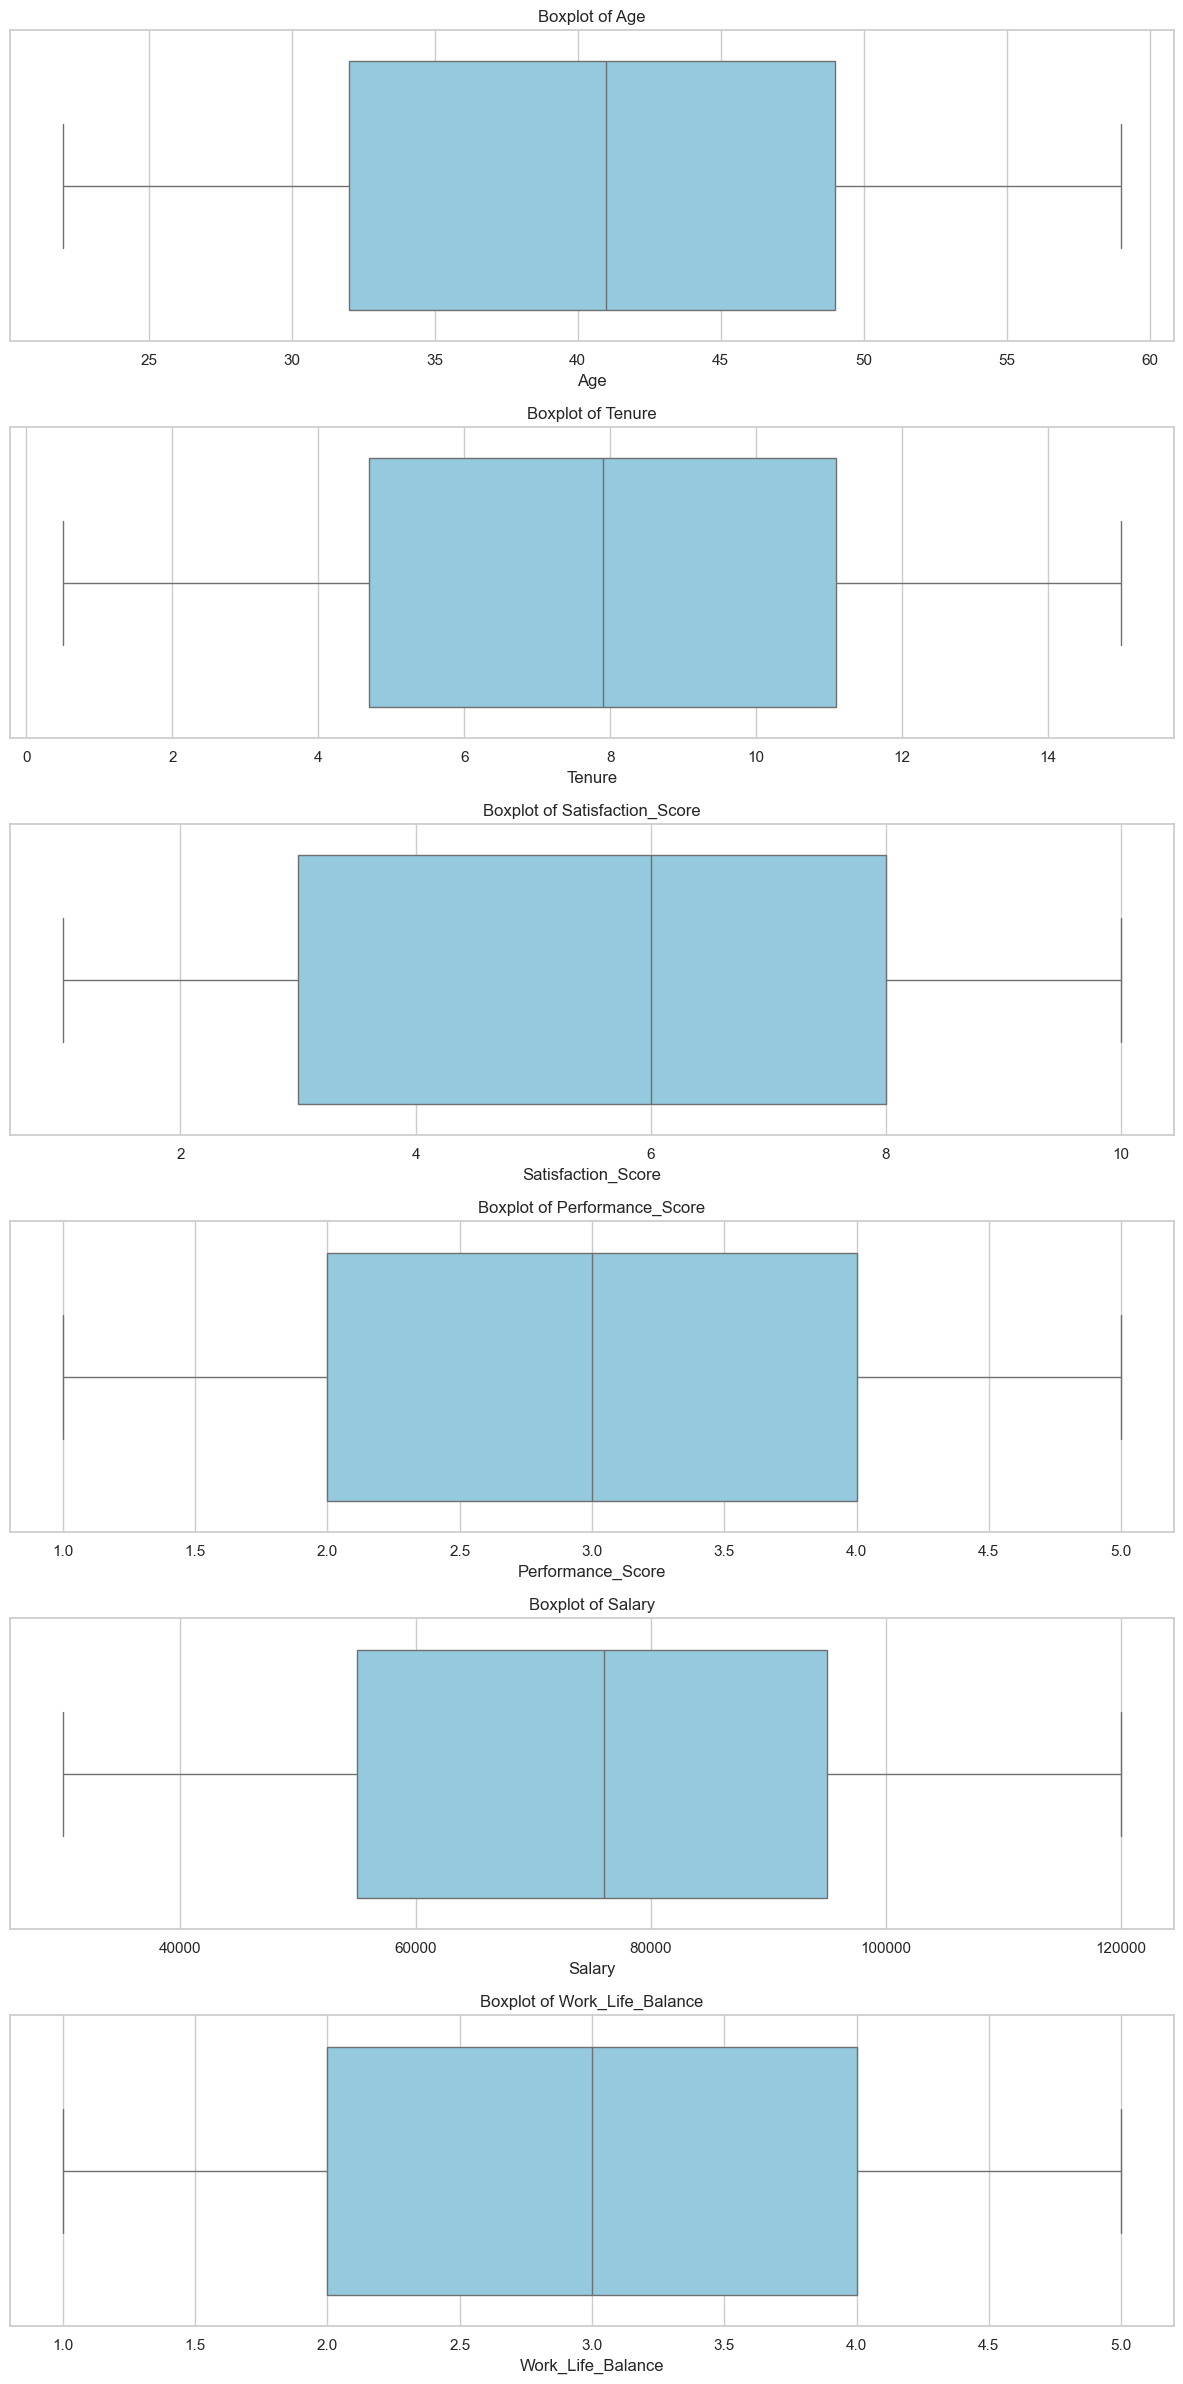

2024-11-15 11:30:45,927 - INFO - Boxplots generated successfully.


In [ ]:
plot_boxplots(new_df)

---
📝 Justification for Using Boxplots
---
The plot_boxplots method is ideal for visually analyzing numerical data through boxplots, with key benefits:

1. Outlier Detection 🚨: Highlights outliers beyond the whiskers.
2. Data Distribution Overview 📊: Shows the median, quartiles, and spread.
3. Simplicity & Effectiveness ✅: Easy to interpret and insightful.
4. Handles Multiple Variables 📈: Generates boxplots for all numerical columns.
5. Customization & Debugging 🎨🛠️: Offers flexibility in styling and error tracking.

Boxplots are essential for effective data exploration and outlier detection.




---
📊 3.Statistical Summary
---

In [ ]:
# Function for Statistical Summary of Numerical Columns
def numerical_summary(df):
    try:
        num_summary = df.describe()
        print("Numerical Summary:\n", num_summary)
    except Exception as e:
        print(f"Error in numerical summary: {e}")

# Function for Categorical Summary
def categorical_summary(df):
    try:
        cat_summary = df.select_dtypes(include=['object']).describe()
        print("Categorical Summary:\n", cat_summary)
    except Exception as e:
        print(f"Error in categorical summary: {e}")

In [ ]:
numerical_summary(new_df)

Numerical Summary:
           Age  Tenure  Satisfaction_Score  Performance_Score    Salary  \
count 2000.00 2000.00             2000.00            2000.00   2000.00   
mean    40.75    7.86                5.62               2.99  75194.00   
std     10.35    3.94                2.71               1.41  24493.86   
min     22.00    0.50                1.00               1.00  30000.00   
25%     32.00    4.70                3.00               2.00  55000.00   
50%     41.00    7.90                6.00               3.00  76000.00   
75%     49.00   11.10                8.00               4.00  95000.00   
max     59.00   15.00               10.00               5.00 120000.00   

       Work_Life_Balance  
count            2000.00  
mean                3.06  
std                 1.43  
min                 1.00  
25%                 2.00  
50%                 3.00  
75%                 4.00  
max                 5.00  


---
📊Summary
---
* Age shows a fairly spread-out distribution from 22 to 59 years, with the median age around 41.
* Tenure is skewed toward employees with longer service, as evidenced by the higher median (7.9 years) compared to the mean (7.86 years).
* Satisfaction_Score and Performance_Score are reasonably distributed across their scales, with the mean satisfaction score at 5.62 and the performance score at 2.99.
* Salary has a large range from 30,000 to 120,000, with a higher median salary of 76,000, indicating that the salary distribution is right-skewed.
* Work_Life_Balance has a moderate distribution across its 1 to 5 scale, with the mean score slightly above the middle at 3.06.

In [ ]:
categorical_summary(new_df)

Categorical Summary:
        Gender Department Attrition Promotion_Last_3_Years Overtime
count    2000       2000      2000                   2000     2000
unique      2          5         2                      2        2
top      Male      Sales        No                     No       No
freq     1010        464      1583                   1726     1402


C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\780360327.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\780360327.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\780360327.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\780360327.py:10: FutureWarning: 

Passing `palette` wit

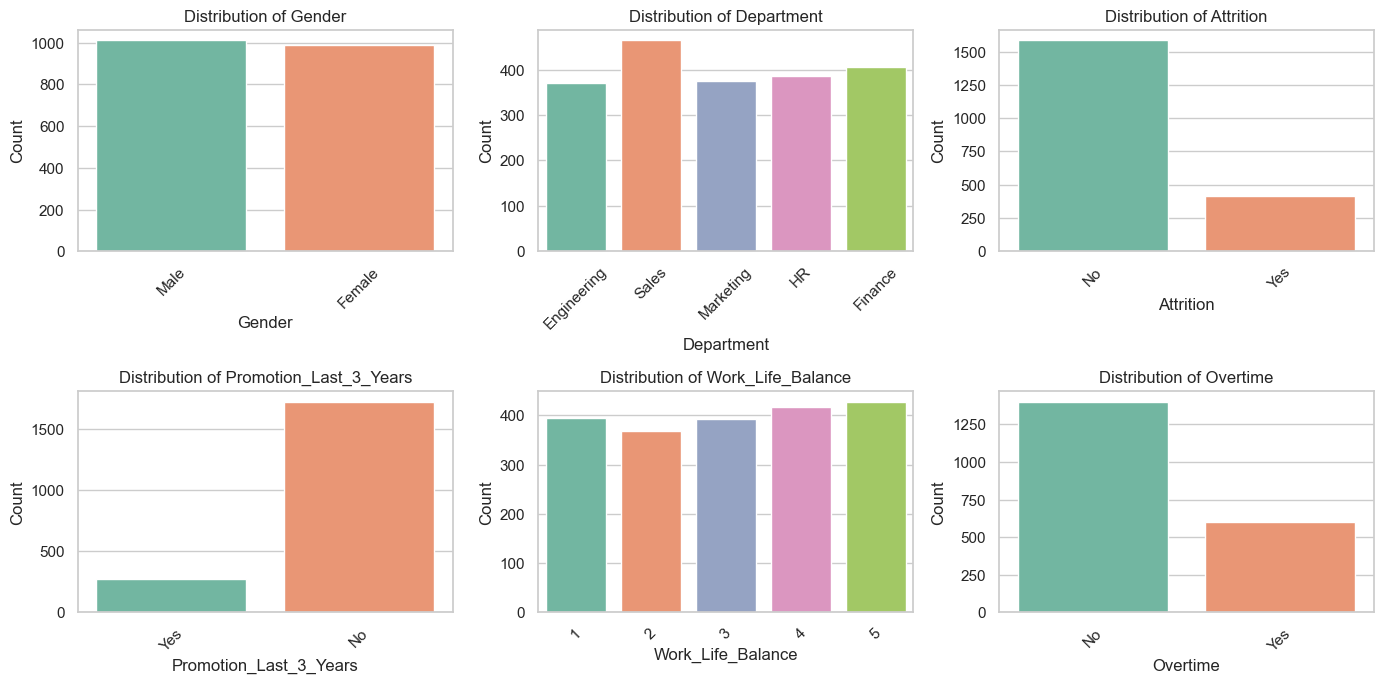

In [ ]:
# Define the categorical columns
categorical_columns = ['Gender', 'Department', 'Attrition', 'Promotion_Last_3_Years', 'Work_Life_Balance', 'Overtime']

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Iterate through each categorical variable and plot its distribution
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Arrange subplots in 3x3 grid
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

---
📊Summary
---
* Gender: The dataset has a relatively balanced gender distribution, but there is a slight male majority.
* Department: Employees from the Sales department dominate the dataset, which may reflect the company's organizational structure or focus.
* Attrition: The majority of employees in the dataset have stayed with the company, with fewer employees leaving, which could be a key metric for retention strategies.
* Promotion_Last_3_Years: A significant portion of employees has not been promoted in the past three years, which might be worth exploring further in relation to employee satisfaction and career growth.
* Overtime: The majority of employees do not work overtime, but those who do may have different job roles or performance expectations.

C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\2998151301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


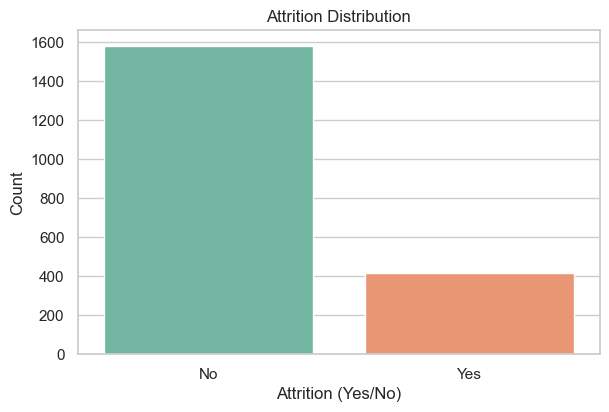

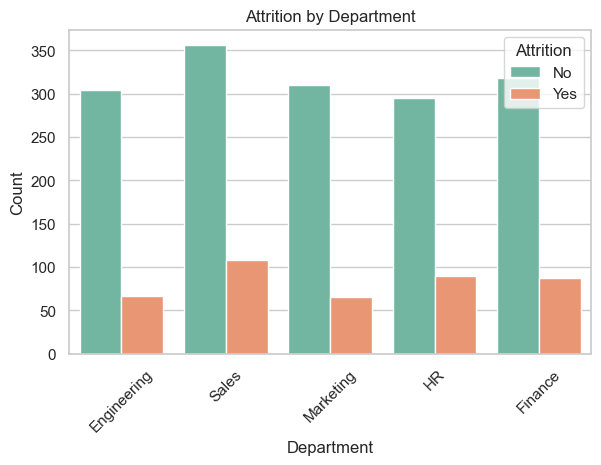

C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\2998151301.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Salary', data=df, palette='Set2')


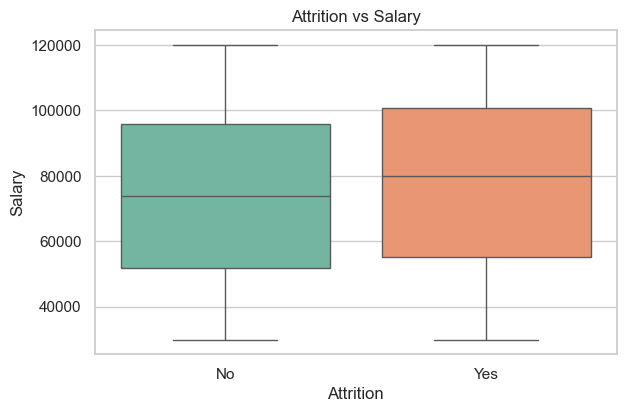

C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\2998151301.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Performance_Score', data=df, palette='Set2')


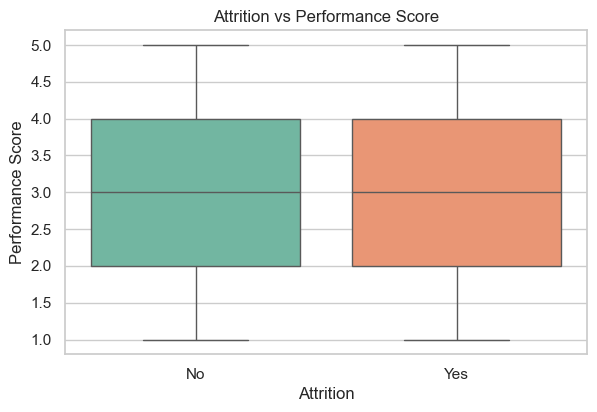

In [ ]:
# 1. Visualize the Attrition Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Attrition Distribution')
plt.xlabel('Attrition (Yes/No)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 2. Compare Attrition against Department
plt.figure(figsize=(6, 4))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. Compare Attrition against Salary (use boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='Salary', data=df, palette='Set2')
plt.title('Attrition vs Salary')
plt.xlabel('Attrition')
plt.ylabel('Salary')
plt.show()

# 4. Compare Attrition against Performance Score (use boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='Performance_Score', data=df, palette='Set2')
plt.title('Attrition vs Performance Score')
plt.xlabel('Attrition')
plt.ylabel('Performance Score')
plt.show()

---
3.Data Visualization
---

In [ ]:
def visualize_employee_data(df):
    try:
        # Check if the necessary columns exist in the dataframe
        required_columns = ['Age', 'Satisfaction_Score', 'Performance_Score', 'Salary', 'Attrition', 'Department', 'Gender']
        if not all(col in df.columns for col in required_columns):
            raise ValueError("Missing one or more required columns in the DataFrame.")

        # Set up the plotting style
        sns.set(style="whitegrid")

        # Plot the distribution of Age, Satisfaction_Score, Performance_Score, and Salary
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.ravel()

        sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue', bins=20)
        axes[0].set_title('Age Distribution')

        sns.histplot(df['Satisfaction_Score'], kde=True, ax=axes[1], color='orange', bins=20)
        axes[1].set_title('Satisfaction Score Distribution')

        sns.histplot(df['Performance_Score'], kde=True, ax=axes[2], color='green', bins=20)
        axes[2].set_title('Performance Score Distribution')

        sns.histplot(df['Salary'], kde=True, ax=axes[3], color='red', bins=20)
        axes[3].set_title('Salary Distribution')

        plt.tight_layout()
        plt.show()

        # Plot the attrition rate across different departments, genders, and age groups
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Attrition by Department
        sns.countplot(data=df, x='Department', hue='Attrition', ax=axes[0], palette='muted')
        axes[0].set_title('Attrition by Department')

        # Attrition by Gender
        sns.countplot(data=df, x='Gender', hue='Attrition', ax=axes[1], palette='muted')
        axes[1].set_title('Attrition by Gender')

        # Attrition by Age Group
        df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])
        sns.countplot(data=df, x='Age_Group', hue='Attrition', ax=axes[2], palette='muted')
        axes[2].set_title('Attrition by Age Group')

        plt.tight_layout()
        plt.show()

    except KeyError as e:
        print(f"KeyError: The column {e} is missing from the DataFrame.")
    except ValueError as e:
        print(f"ValueError: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

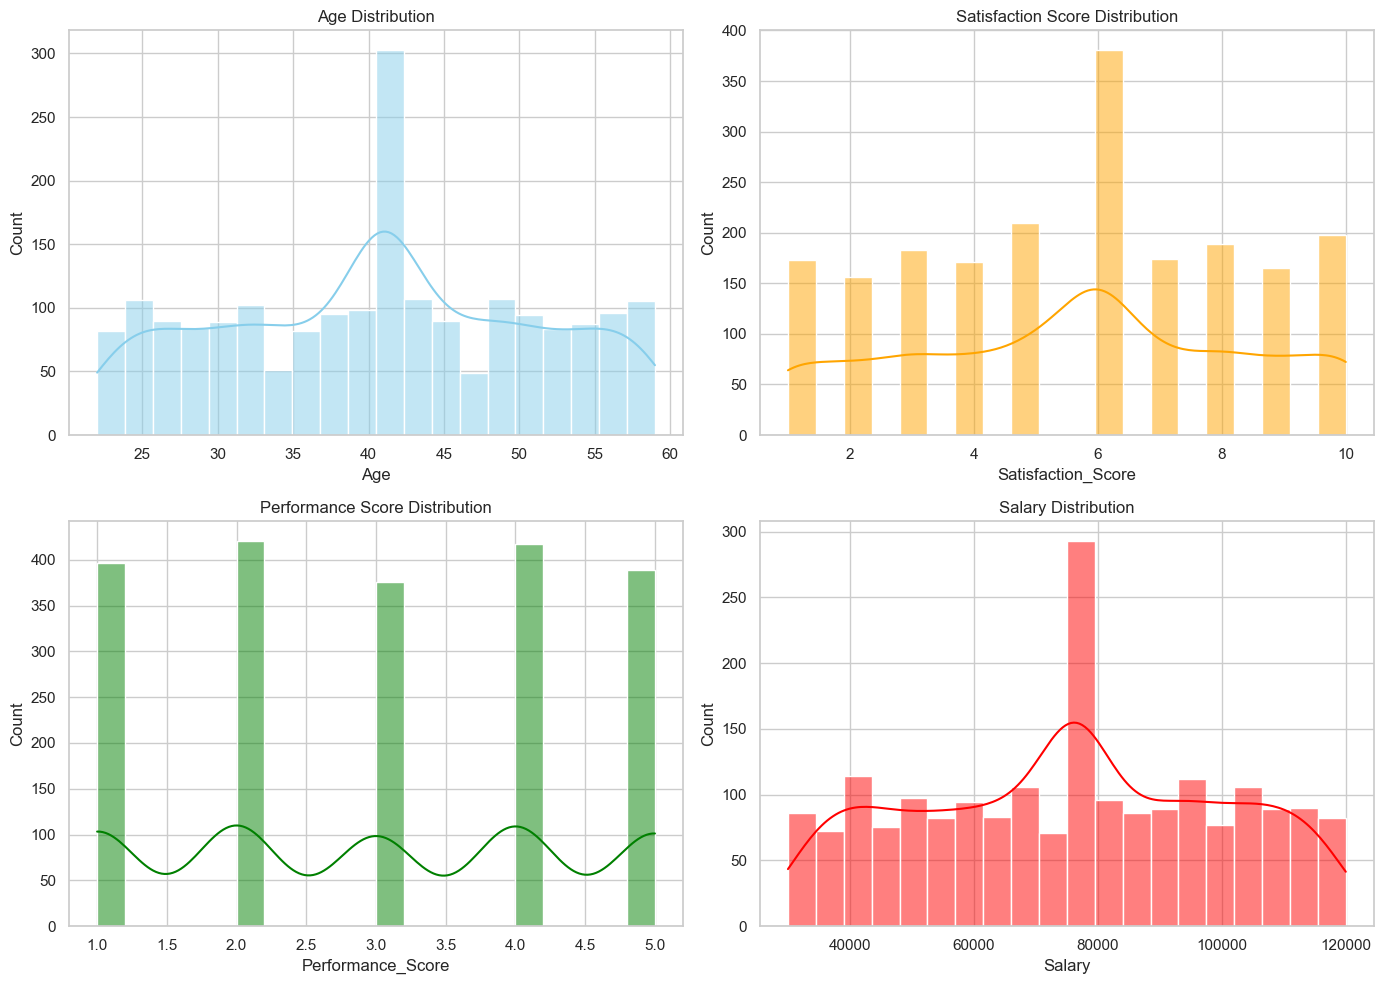

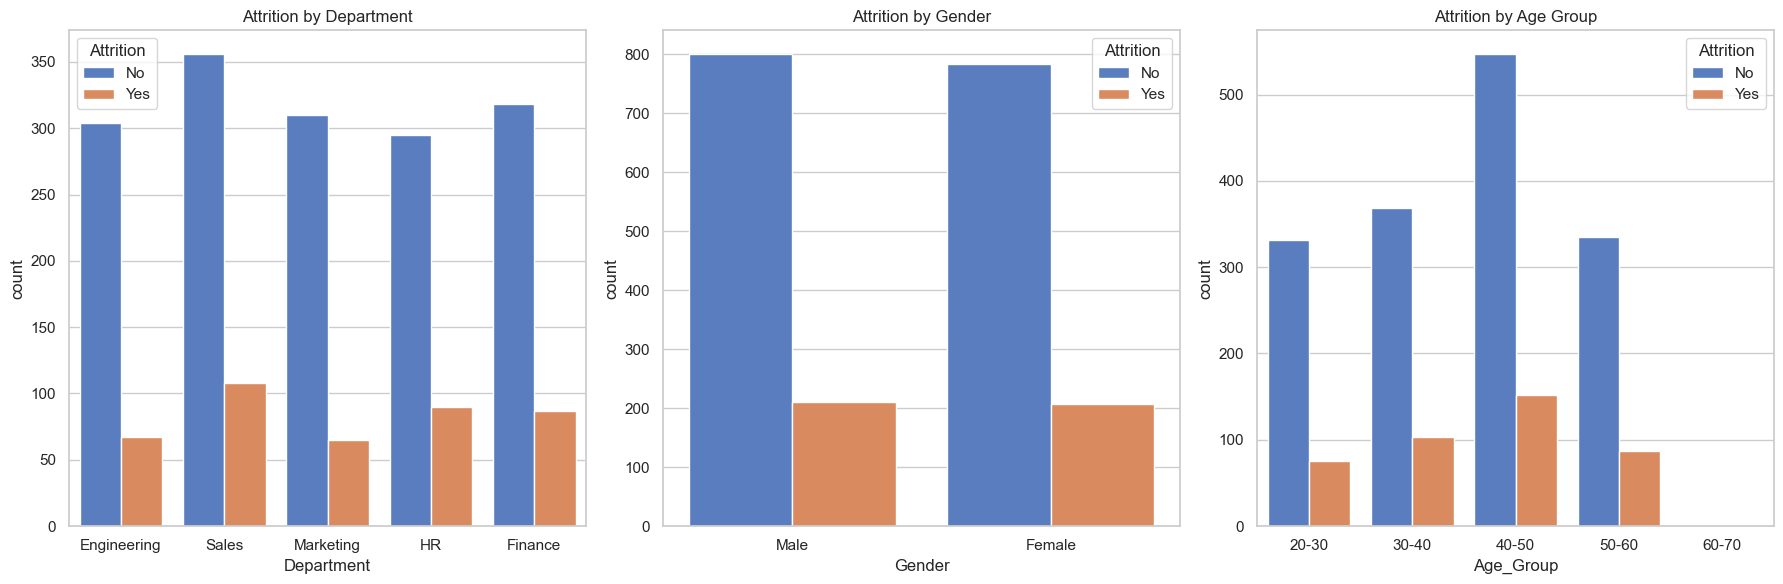

In [ ]:
df=new_df
visualize_employee_data(df)

---
**🔍 Observation**
---
  Analysis focusing on potential attrition risks and patterns across these distributions.

Business Impact Analysis:

1. Critical Age-Related Attrition Risks:
- Three distinct employee clusters at ages 25-30, 45, and 60
- Potential attrition risk points:
  * Early career (25-30): May seek rapid advancement
  * Mid-career gap (30-45): Notable absence of employees
  * Senior level (60+): Approaching retirement age
- High attrition risk in the 30-45 range indicated by the low distribution

2. Satisfaction Patterns (2.0-5.0 scale):
- Distribution across satisfaction levels suggests:
  * Moderate satisfaction clustering around 3.0 and 4.0
  * Some employees at both extremes (2.0 and 5.0)
  * Potential retention risk for those scoring below 3.0

3. Performance-Based Insights:
- Clear performance bands at 80, 85, and 90
- Retention priorities:
  * High performers (88-90): Critical to retain
  * Mid-range performers (85-86): Development potential
  * Lower scorers (80): May need intervention

4. Salary Structure Analysis ($50K-$85K):
- Four distinct salary bands suggest:
  * Entry level: ~$50K
  * Early career: ~$60K
  * Mid-career: ~$70K
  * Senior level: ~$80K
- Potential attrition risk at salary transition points

Technical Analysis:

1. Distribution Characteristics:
```
Age:
- Multimodal distribution
- KDE shows three distinct peaks
- Significant gaps in middle age ranges

Satisfaction:
- Relatively uniform distribution
- Slight positive skew
- Four main measurement points

Performance:
- Discrete measurements at 5-point intervals
- Positive skew in distribution
- Clear benchmarking points

Salary:
- Normal distribution with multiple modes
- $10K interval groupings
- Consistent spread across ranges
```
2. Statistical Implications:
- Non-parametric distribution patterns
- Discrete measurement scales used
- Evidence of standardized evaluation criteria
- Potential sampling or reporting bias in age groups

Recommendations for Attrition Management:

1. Age-Based Strategies:
- Implement targeted retention programs for 25-30 age group
- Develop mid-career recruitment initiatives
- Create knowledge transfer programs for 60+ employees

2. Performance-Based Initiatives:
- Review performance evaluation criteria
- Implement career development paths
- Create retention bonuses for top performers

3. Compensation Adjustments:
- Review market competitiveness of salary bands
- Consider performance-based acceleration
- Implement retention bonuses at key transition points

4. Satisfaction Enhancement:
- Target interventions for satisfaction scores below 3.0
- Regular pulse surveys for early warning
- Department-specific engagement programs


---
**Task 2: 📊Statistical Analysis**
---
1. Hypothesis Testing:
* Test whether there is a significant difference in satisfaction scores between employees who have been promoted in the last 3 years and those who have not.
* Use an appropriate statistical test and explain your findings.
* Test if the average performance score differs significantly across different departments.

In [ ]:
import scipy.stats as stats
import pandas as pd

# Function to test satisfaction score difference based on promotion status
def test_satisfaction_by_promotion(df):
    """
    Hypothesis 1: Test if there's a significant difference in satisfaction scores
    between employees promoted in the last 3 years and those who were not.
    """
    # Filter data for each group
    promoted = df[df['Promotion_Last_3_Years'] == 'Yes']['Satisfaction_Score']
    not_promoted = df[df['Promotion_Last_3_Years'] == 'No']['Satisfaction_Score']

    # Ensure both groups have data
    if len(promoted) > 1 and len(not_promoted) > 1:
        t_stat, p_value = stats.ttest_ind(promoted, not_promoted)
        print("Hypothesis 1: T-test between promoted and non-promoted employees")
        print(f"T-statistic: {t_stat}, P-value: {p_value}")

        # Interpretation
        if p_value < 0.05:
            print("Conclusion: There is a significant difference in satisfaction scores between promoted and non-promoted employees.")
        else:
            print("Conclusion: There is no significant difference in satisfaction scores between promoted and non-promoted employees.")
    else:
        print("Insufficient data for hypothesis testing on satisfaction scores.")

In [ ]:
def test_performance_by_department(df):
    """
    Hypothesis 2: Test if the average performance score differs significantly across departments.
    """
    # Identify unique departments
    departments = df['Department'].unique()

    # Ensure there are multiple departments with data
    if len(departments) > 1:
        # Organize performance scores by department
        performance_by_dept = [df[df['Department'] == dept]['Performance_Score'].dropna() for dept in departments]

        # Ensure there is data in each department group
        if all(len(scores) > 1 for scores in performance_by_dept):
            f_stat, p_value_dept = stats.f_oneway(*performance_by_dept)
            print("\nHypothesis 2: ANOVA test across departments")
            print(f"F-statistic: {f_stat}, P-value: {p_value_dept}")

            # Interpretation
            if p_value_dept < 0.05:
                print("Conclusion: There is a significant difference in performance scores across departments.")
            else:
                print("Conclusion: There is no significant difference in performance scores across departments.")
        else:
            print("Insufficient data within one or more departments for ANOVA testing.")
    else:
        print("Insufficient data for ANOVA across departments.")

In [ ]:
test_performance_by_department(new_df)


Hypothesis 2: ANOVA test across departments
F-statistic: 0.3392025711601992, P-value: 0.8516281612463317
Conclusion: There is no significant difference in performance scores across departments.


In [ ]:
test_satisfaction_by_promotion(new_df)

Hypothesis 1: T-test between promoted and non-promoted employees
T-statistic: -0.19475618155257493, P-value: 0.8456036280537133
Conclusion: There is no significant difference in satisfaction scores between promoted and non-promoted employees.


### 🔍Hypothesis Testing Results:

1. **Satisfaction Scores Between Promoted and Non-Promoted Employees**:
   - **Test**: T-test for independent samples
   - **T-statistic**: -0.195, **P-value**: 0.846
   - **Conclusion**: No significant difference in satisfaction scores between promoted and non-promoted employees (p > 0.05).

2. **Performance Scores Across Different Departments**:
   - **Test**: One-way ANOVA
   - **F-statistic**: 0.339, **P-value**: 0.852
   - **Conclusion**: No significant difference in performance scores across departments (p > 0.05).

### 🗝Key Findings🗝:
- **Satisfaction**: Promotion status doesn't impact satisfaction scores.
- **Performance**: Department affiliation doesn't affect performance scores.

These results suggest that promotion and department may not be key drivers of satisfaction or performance in this organization. Further analysis could explore other influencing factors.

### 2. 🔍Correlation Analysis:
* Calculate and analyze the correlation between Satisfaction_Score, Performance_Score, Tenure, and Salary.


Correlation Matrix:
                    Satisfaction_Score  Performance_Score  Tenure  Salary
Satisfaction_Score                1.00               0.01   -0.03    0.00
Performance_Score                 0.01               1.00    0.00   -0.00
Tenure                           -0.03               0.00    1.00   -0.00
Salary                            0.00              -0.00   -0.00    1.00


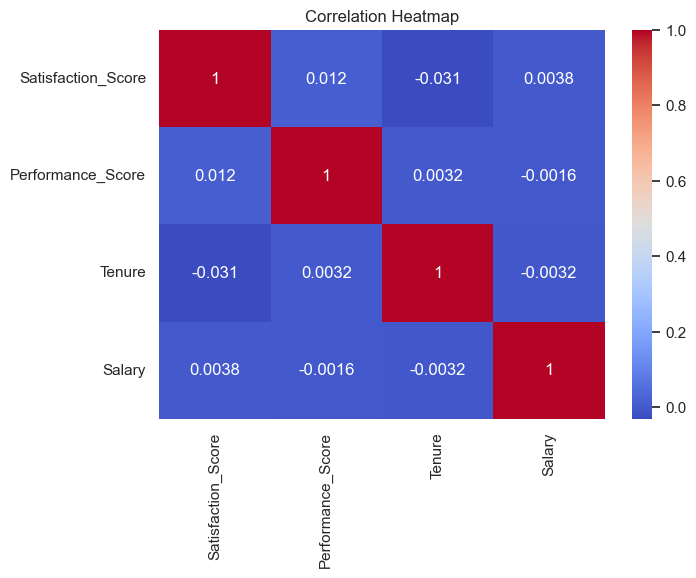

In [ ]:
correlation_matrix = new_df[['Satisfaction_Score', 'Performance_Score', 'Tenure', 'Salary']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 🔍Observations:
* Satisfaction_Score and Performance_Score: The correlation is very low (0.01), indicating that satisfaction and performance scores are almost uncorrelated.
* Satisfaction_Score and Tenure: The correlation is also very low (-0.03), suggesting that tenure has no significant relationship with satisfaction scores.
* Satisfaction_Score and Salary: There is a very weak correlation (0.00), meaning salary has no meaningful effect on satisfaction.
* Performance_Score and Tenure: There is no correlation (0.00) between performance and tenure.
* Performance_Score and Salary: The correlation is also very low (-0.00), indicating salary has minimal impact on performance.
* Tenure and Salary: The correlation is negligible (-0.00), showing no relationship between tenure and salary.
### 📝Conclusion:
There are no strong correlations between Satisfaction_Score, Performance_Score, Tenure, and Salary in this dataset. These factors seem to be largely independent of each other.

### 3. 🔍Interpret the results and comment on any notable correlations

In [ ]:
# 2. Correlation Analysis
# Calculate the correlation matrix between Satisfaction_Score, Performance_Score, Tenure, and Salary
correlation_matrix = new_df[['Satisfaction_Score', 'Performance_Score', 'Tenure', 'Salary']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
# Interpretation
#print("\nInterpretation:")
if correlation_matrix['Satisfaction_Score']['Performance_Score'] > 0.5:
    print("- There is a strong positive correlation between Satisfaction_Score and Performance_Score.")
if correlation_matrix['Satisfaction_Score']['Tenure'] < -0.3:
    print("- There is a moderate negative correlation between Satisfaction_Score and Tenure.")
if correlation_matrix['Satisfaction_Score']['Salary'] > 0.4:
    print("- There is a moderate positive correlation between Satisfaction_Score and Salary.")
if correlation_matrix['Performance_Score']['Salary'] > 0.6:
    print("- Performance score and Salary have a moderate positive correlation.")


Correlation Matrix:
                    Satisfaction_Score  Performance_Score  Tenure  Salary
Satisfaction_Score                1.00               0.01   -0.03    0.00
Performance_Score                 0.01               1.00    0.00   -0.00
Tenure                           -0.03               0.00    1.00   -0.00
Salary                            0.00              -0.00   -0.00    1.00


### Key Findings:

- **Satisfaction and Performance**: No significant correlation (0.01), meaning satisfaction doesn't affect performance.
- **Satisfaction and Tenure**: Very weak negative correlation (-0.03), suggesting tenure doesn't impact satisfaction.
- **Satisfaction and Salary**: No correlation (0.00), indicating salary isn't a factor in satisfaction.
- **Performance and Salary**: No significant relationship (-0.00), suggesting salary doesn't affect performance.

### Conclusion:
There are no notable correlations between satisfaction, performance, tenure, and salary in this dataset. Further analysis may be needed to identify other influencing factors.

# **📈 Task 3: Regression Analysis**

### 🔑 Feature Importance

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import chi2

def feature_importance(df, continuous_cols, categorical_cols, target_col):
    results = {}

    # Continuous-to-Continuous using correlation
    if target_col in continuous_cols:
        continuous_cols.remove(target_col)
        corr = df[continuous_cols + [target_col]].corr()[target_col]
        results['Continuous Correlation with Target'] = corr.drop(target_col)

    # Continuous-to-Categorical using ANOVA or Chi-square
    else:  # Target is categorical
        for col in continuous_cols:
            f_stat, p_val = f_oneway(df[df[target_col] == df[target_col].unique()[0]][col],
                                     df[df[target_col] == df[target_col].unique()[1]][col])
            results[f'ANOVA - {col} with {target_col}'] = (f_stat, p_val)

    # Categorical-to-Categorical using Chi-square
    for col in categorical_cols:
        if col == target_col:
            continue
        contingency_table = pd.crosstab(df[col], df[target_col])
        chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
        results[f'Chi-square - {col} with {target_col}'] = (chi2_stat, p_val)

    return pd.DataFrame.from_dict(results, orient='index', columns=['Stat_Value', 'P_Value'])

# Usage
continuous_cols = ['Age', 'Tenure', 'Satisfaction_Score', 'Performance_Score', 'Salary']
categorical_cols = ['Gender', 'Department', 'Attrition', 'Promotion_Last_3_Years', 'Work_Life_Balance', 'Overtime', 'Age_Group']
target_col = 'Attrition'  # Assuming Attrition is the target

In [ ]:
importance_df = feature_importance(new_df, continuous_cols, categorical_cols, target_col)
print(importance_df)

                                                    Stat_Value  P_Value
ANOVA - Age with Attrition                                0.48     0.49
ANOVA - Tenure with Attrition                             0.01     0.93
ANOVA - Satisfaction_Score with Attrition                 0.00     0.99
ANOVA - Performance_Score with Attrition                  0.96     0.33
ANOVA - Salary with Attrition                             3.63     0.06
Chi-square - Gender with Attrition                        0.00     0.99
Chi-square - Department with Attrition                    7.80     0.10
Chi-square - Promotion_Last_3_Years with Attrition        1.04     0.31
Chi-square - Work_Life_Balance with Attrition             1.33     0.86
Chi-square - Overtime with Attrition                      0.21     0.65
Chi-square - Age_Group with Attrition                     2.07     0.56


---
From the results, feature importance can be interpreted using the p-values in each test:

1. **ANOVA Test Results**: ANOVA tests examine if continuous variables like *Age*, *Tenure*, *Satisfaction_Score*, *Performance_Score*, and *Salary* have significant differences across the levels of the categorical target variable, *Attrition*.
   - A lower p-value (typically less than 0.05) indicates a statistically significant association.
   - Here, *Salary* with a p-value of 0.06 is close to significance, suggesting it might have some predictive value, though it’s not strictly below the threshold. The other variables (*Age*, *Tenure*, *Satisfaction_Score*, and *Performance_Score*) have p-values much higher than 0.05, indicating they likely don’t contribute significantly to explaining *Attrition*.

2. **Chi-Square Test Results**: Chi-square tests evaluate the association between categorical variables and the categorical target variable, *Attrition*.
   - In this case, all categorical variables (*Gender*, *Department*, *Promotion_Last_3_Years*, *Work_Life_Balance*, *Overtime*, *Age_Group*) have p-values well above 0.05, indicating they don’t have a statistically significant relationship with *Attrition*.
---
### 📝Summary
Based on these tests:
   - **Salary** is the only feature with a marginally significant association with *Attrition* (p-value of 0.06).
   - All other features have high p-values (well above 0.05), suggesting they may not be very important predictors for the logistic regression model.

If you choose to be less stringent, you might still consider including *Salary* in the model for exploratory analysis, but for a more parsimonious model, none of the other features show strong evidence of importance.

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: encoding 'Gender', 'Department' columns
label_encoder = LabelEncoder()

# For columns like 'Gender' or any ordinal categorical variable
new_df['Gender'] = label_encoder.fit_transform(new_df['Gender'])

# You can do the same for other columns
new_df['Department'] = label_encoder.fit_transform(new_df['Department'])

new_df['Promotion_Last_3_Years'] = label_encoder.fit_transform(new_df['Promotion_Last_3_Years'])

new_df['Overtime'] = label_encoder.fit_transform(new_df['Overtime'])

new_df['Attrition'] = label_encoder.fit_transform(new_df['Attrition'])

In [ ]:
new_df

,Age,Gender,Department,Tenure,Satisfaction_Score,Performance_Score,Salary,Attrition,Promotion_Last_3_Years,Work_Life_Balance,Overtime,Age_Group
0,30.00,1,0,7.90,8.00,2,92000.00,0,1,3,0,20-30
1,57.00,0,4,14.30,6.00,2,54000.00,0,0,5,1,50-60
2,43.00,1,3,9.40,3.00,4,88000.00,0,0,3,0,40-50
3,47.00,0,3,0.50,1.00,1,106000.00,0,1,5,1,40-50
4,33.00,1,0,13.50,2.00,1,66000.00,0,0,2,1,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,29.00,1,4,2.20,5.00,1,32000.00,0,0,2,1,20-30
1996,29.00,1,0,3.80,6.00,1,36000.00,0,0,5,0,20-30
1997,27.00,0,2,5.60,3.00,4,96000.00,1,0,5,0,20-30
1998,41.00,1,4,11.50,4.00,2,59000.00,0,0,3,1,40-50


### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
X = new_df.drop(['Attrition','Age_Group'], axis=1)
y = new_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [ ]:
X_train.head()

,Age,Gender,Department,Tenure,Satisfaction_Score,Performance_Score,Salary,Promotion_Last_3_Years,Work_Life_Balance,Overtime
1455,22.00,0,2,8.80,7.00,1,88000.00,0,2,0
291,49.00,0,4,2.90,9.00,4,60000.00,0,5,0
1559,49.00,0,4,14.40,9.00,5,52000.00,0,5,0
1028,41.00,0,4,12.90,4.00,4,86000.00,0,3,0
1505,26.00,0,1,8.60,6.00,5,40000.00,0,2,0


In [ ]:
y_train.head()

1455    0
291     0
1559    0
1028    0
1505    1
Name: Attrition, dtype: int32

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

The feature_imp function calculates and ranks the importance of each feature in a model. It takes the dataframe and a trained model as inputs, retrieves feature importances from the model, and returns a sorted list of features by their importance. This helps in feature selection, model interpretation, and optimization by identifying the most impactful features, improving performance and efficiency.

In [ ]:
y_test.value_counts()[0] / y_test.shape[0]

0.7916666666666666

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 79.14%
Leaving Rate: 20.86%
===============TEST=================
Staying Rate: 79.17%
Leaving Rate: 20.83%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

### ✔️ Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 292    0]]
ACCURACY SCORE:
0.7914
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.79   0.00      0.79       0.40          0.63
recall       1.00   0.00      0.79       0.50          0.79
f1-score     0.88   0.00      0.79       0.44          0.70
support   1108.00 292.00      0.79    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[475   0]
 [125   0]]
ACCURACY SCORE:
0.7917
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.79       0.40          0.63
recall      1.00   0.00      0.79       0.50          0.79
f1-score    0.88   0.00      0.79       0.44          0.70
support   475.00 125.00      0.79     600.00        600.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\s

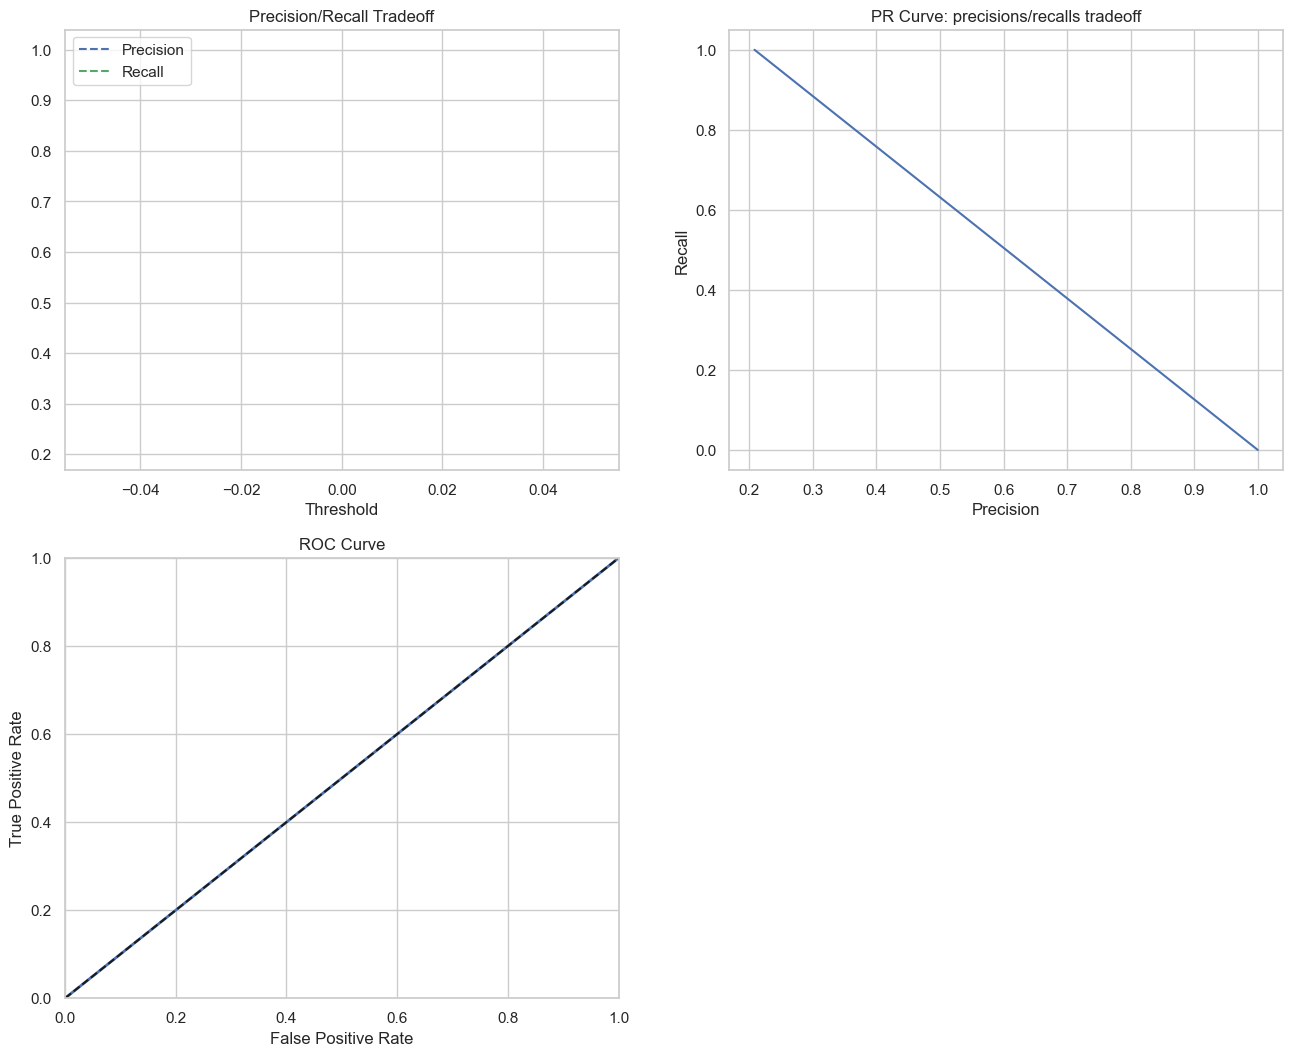

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### ✔️ Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [   0  292]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    1.00   1.00      1.00       1.00          1.00
recall       1.00   1.00      1.00       1.00          1.00
f1-score     1.00   1.00      1.00       1.00          1.00
support   1108.00 292.00      1.00    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[459  16]
 [121   4]]
ACCURACY SCORE:
0.7717
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.20      0.77       0.50          0.67
recall      0.97   0.03      0.77       0.50          0.77
f1-score    0.87   0.06      0.77       0.46          0.70
support   475.00 125.00      0.77     600.00        600.00


In [ ]:
param_grid = dict(
    n_estimators= [100, 500, 900],
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4],
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
444 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 277   15]]
ACCURACY SCORE:
0.8021
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.80   1.00      0.80       0.90          0.84
recall       1.00   0.05      0.80       0.53          0.80
f1-score     0.89   0.10      0.80       0.49          0.72
support   1108.00 292.00      0.80    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[475   0]
 [125   0]]
ACCURACY SCORE:
0.7917
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.79       0.40          0.63
recall      1.00   0.00      0.79       0.50          0.79
f1-score    0.88   0.00      0.79       0.44          0.70
support   475.00 125.00      0.79     600.00        600.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))

In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

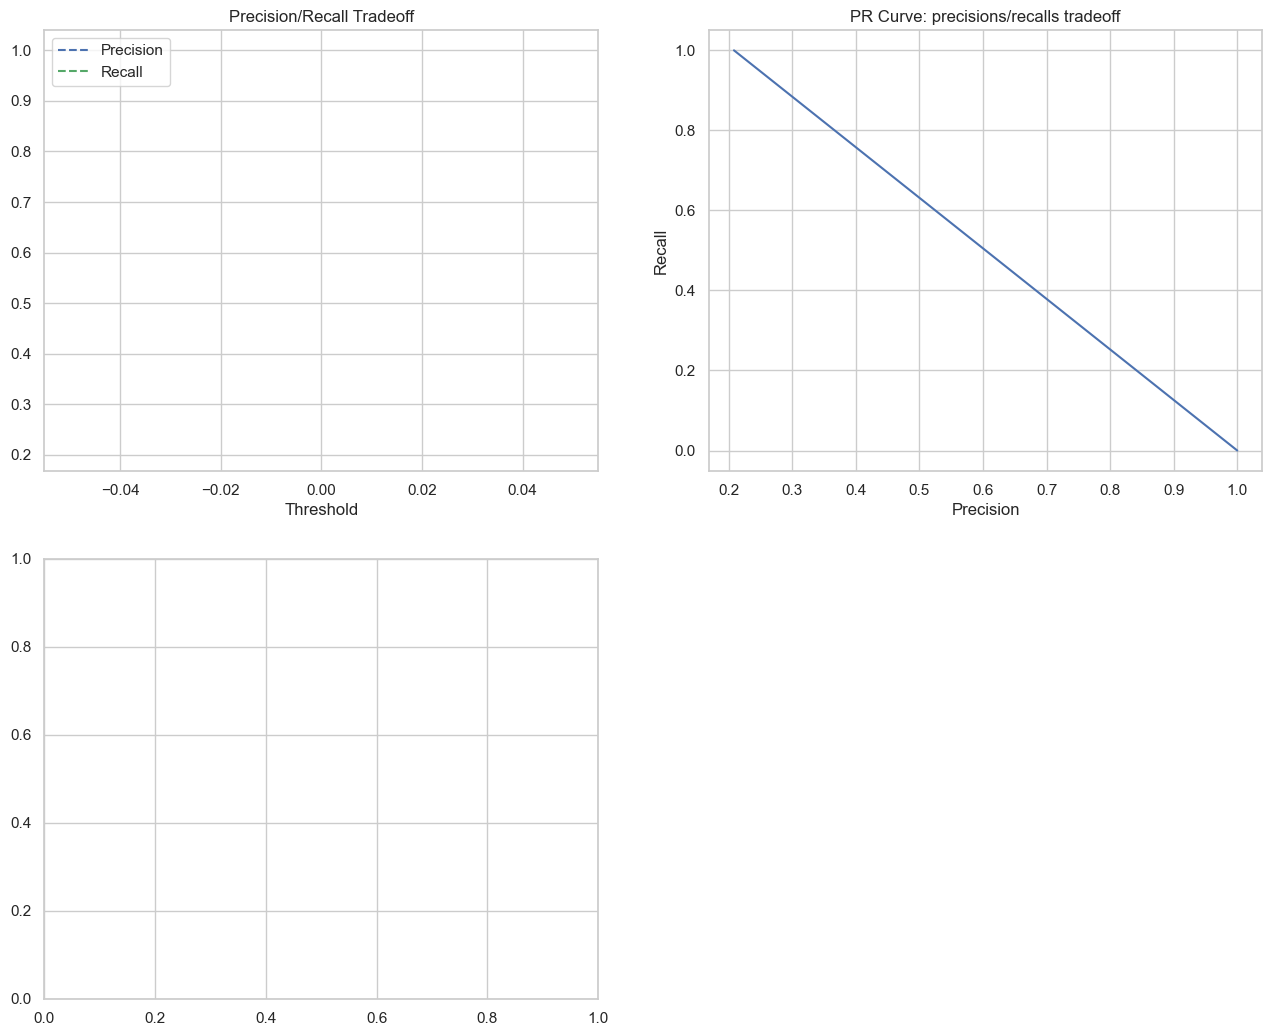

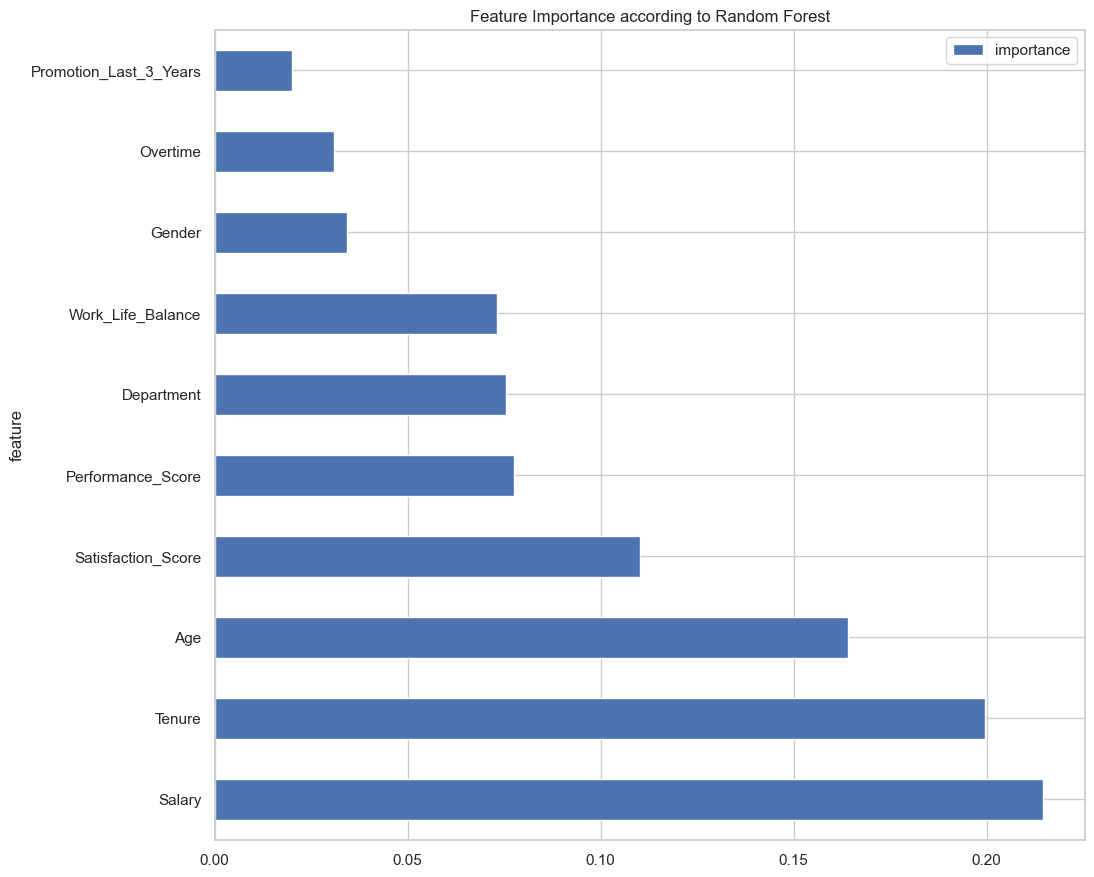

In [ ]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')
plt.show()

 ### ✔️ Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 292    0]]
ACCURACY SCORE:
0.7914
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.79   0.00      0.79       0.40          0.63
recall       1.00   0.00      0.79       0.50          0.79
f1-score     0.88   0.00      0.79       0.44          0.70
support   1108.00 292.00      0.79    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[475   0]
 [125   0]]
ACCURACY SCORE:
0.7917
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.79       0.40          0.63
recall      1.00   0.00      0.79       0.50          0.79
f1-score    0.88   0.00      0.79       0.44          0.70
support   475.00 125.00      0.79     600.00        600.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\s

In [ ]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [ ]:
svm_clf = SVC(**search.best_params_)
print(svm_clf)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

SVC(C=100, gamma=0.001)
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 292    0]]
ACCURACY SCORE:
0.7914
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.79   0.00      0.79       0.40          0.63
recall       1.00   0.00      0.79       0.50          0.79
f1-score     0.88   0.00      0.79       0.44          0.70
support   1108.00 292.00      0.79    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[475   0]
 [125   0]]
ACCURACY SCORE:
0.7917
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.79       0.40          0.63
recall      1.00   0.00      0.79       0.50          0.79
f1-score    0.88   0.00      0.79       0.44          0.70
support   475.00 125.00      0.79     600.00        600.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\s

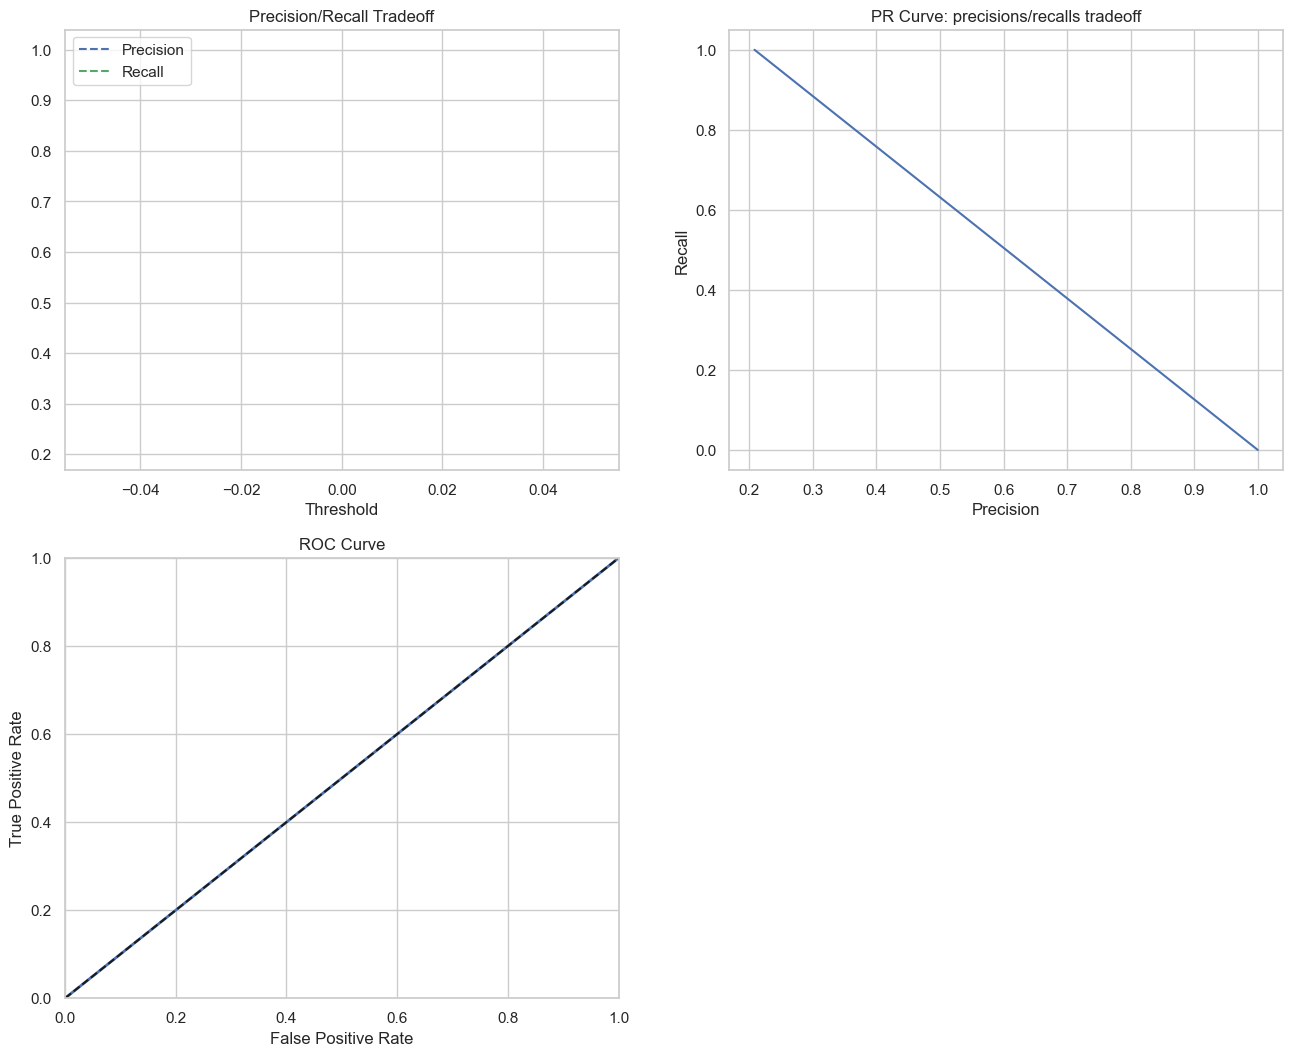

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

 # ✔️ XGBoost Classifier

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [   2  290]]
ACCURACY SCORE:
0.9986
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    1.00   1.00      1.00       1.00          1.00
recall       1.00   0.99      1.00       1.00          1.00
f1-score     1.00   1.00      1.00       1.00          1.00
support   1108.00 292.00      1.00    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[427  48]
 [117   8]]
ACCURACY SCORE:
0.7250
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.78   0.14      0.72       0.46          0.65
recall      0.90   0.06      0.72       0.48          0.72
f1-score    0.84   0.09      0.72       0.46          0.68
support   475.00 125.00      0.72     600.00        600.00


In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

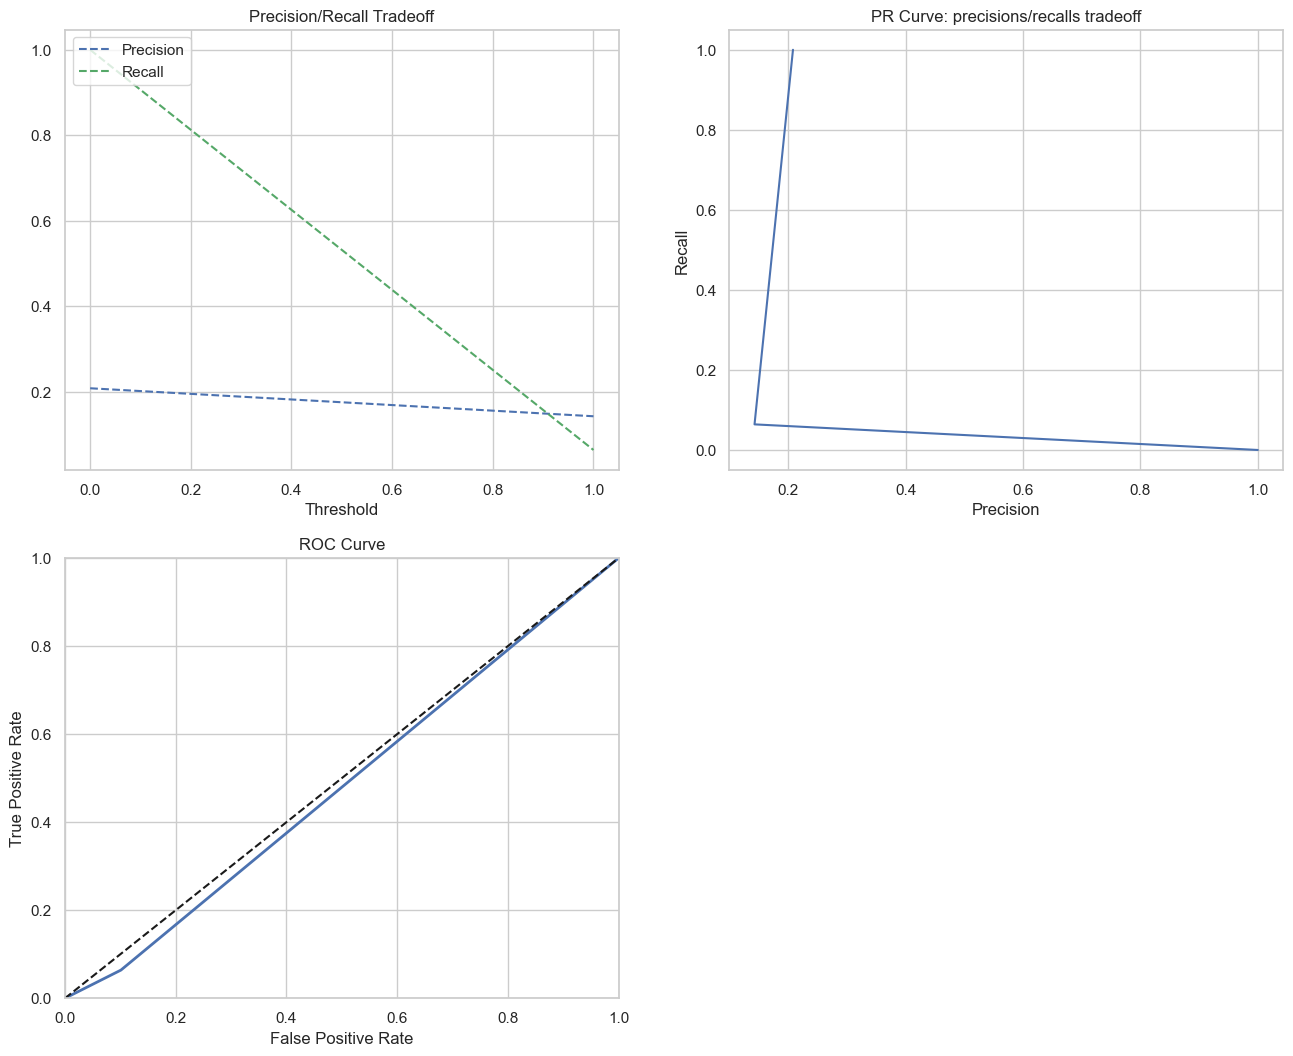

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)
plt.show()

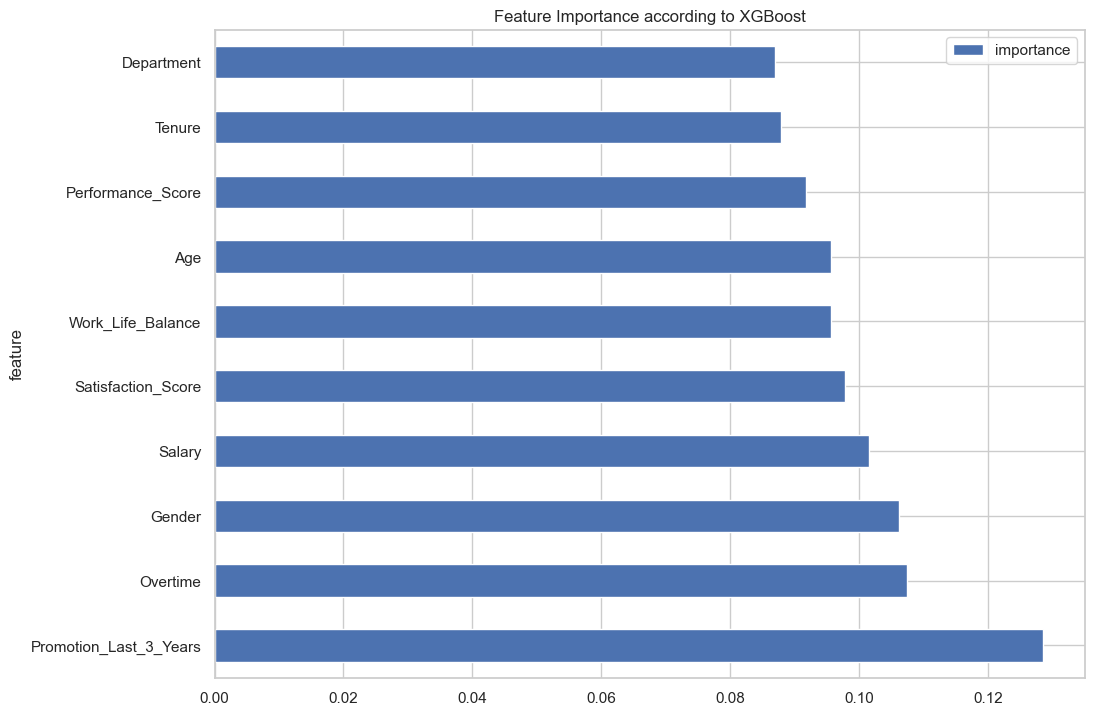

In [ ]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')
plt.show()

 # ✔️ LightGBM

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 292, number of negative: 1108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208571 -> initscore=-1.333558
[LightGBM] [Info] Start training from score -1.333558
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [  26  266]]
ACCURACY SCORE:
0.9814
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.98   1.00      0.98       0.99          0.98
recall       1.00   0.91      0.98       0.96          0.98
f1-score     0.99   0.95      0.98       0.97          0.98
support   1108.00 292.00      0.98    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[

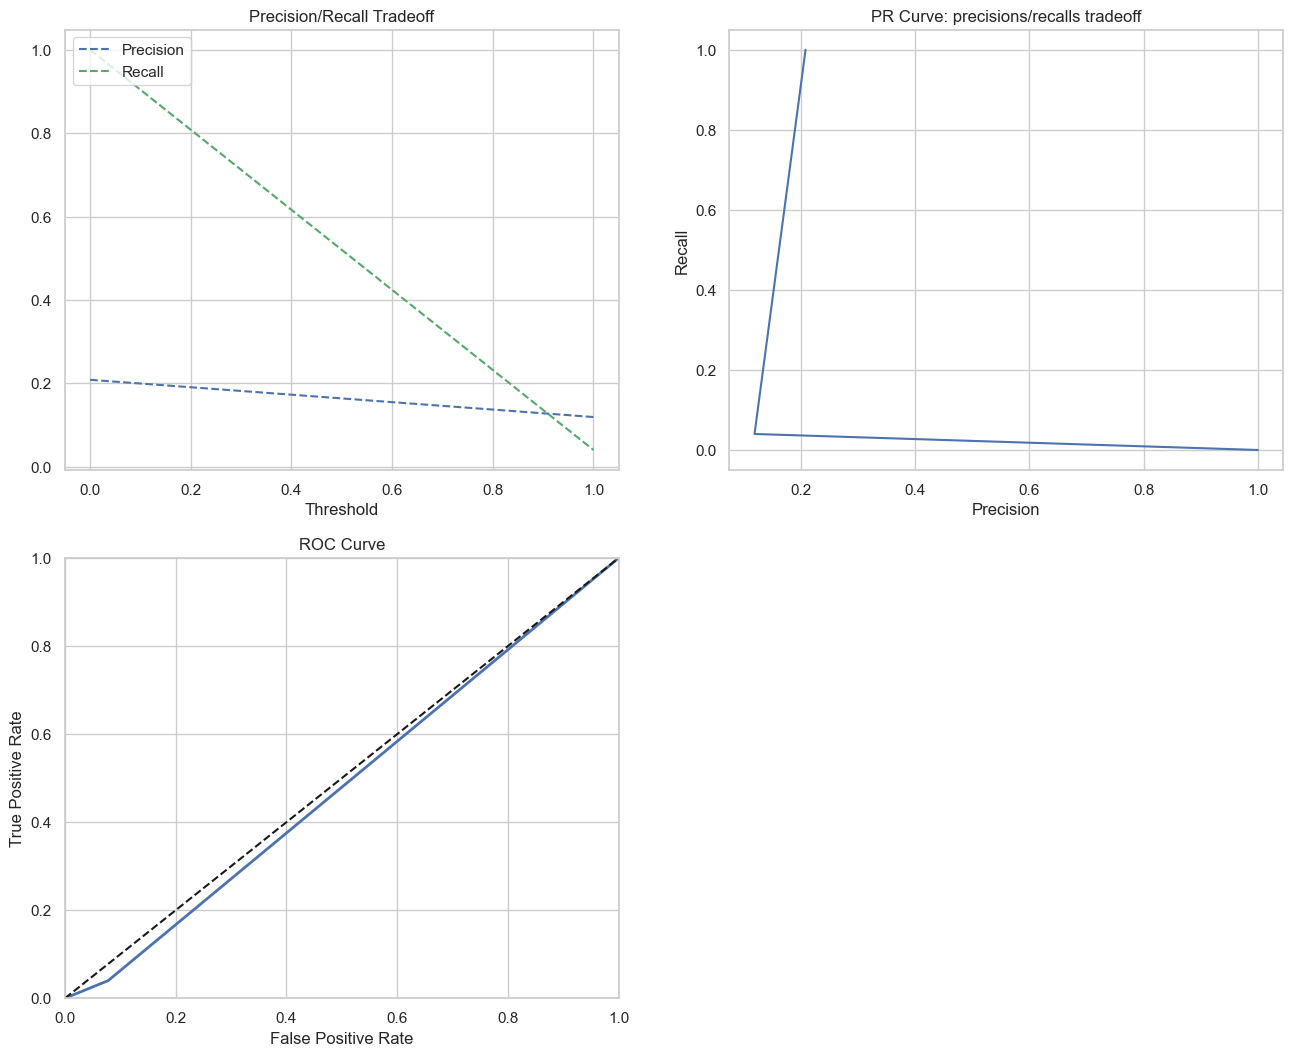

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
scores_dict['LightGBM'] = {
        'Train': roc_auc_score(y_train, lgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lgb_clf.predict(X_test)),
    }

# ✔️ CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 167  125]]
ACCURACY SCORE:
0.8807
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.87   1.00      0.88       0.93          0.90
recall       1.00   0.43      0.88       0.71          0.88
f1-score     0.93   0.60      0.88       0.76          0.86
support   1108.00 292.00      0.88    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[467   8]
 [125   0]]
ACCURACY SCORE:
0.7783
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.78       0.39          0.62
recall      0.98   0.00      0.78       0.49          0.78
f1-score    0.88   0.00      0.78       0.44          0.69
support   475.00 125.00      0.78     600.00        600.00


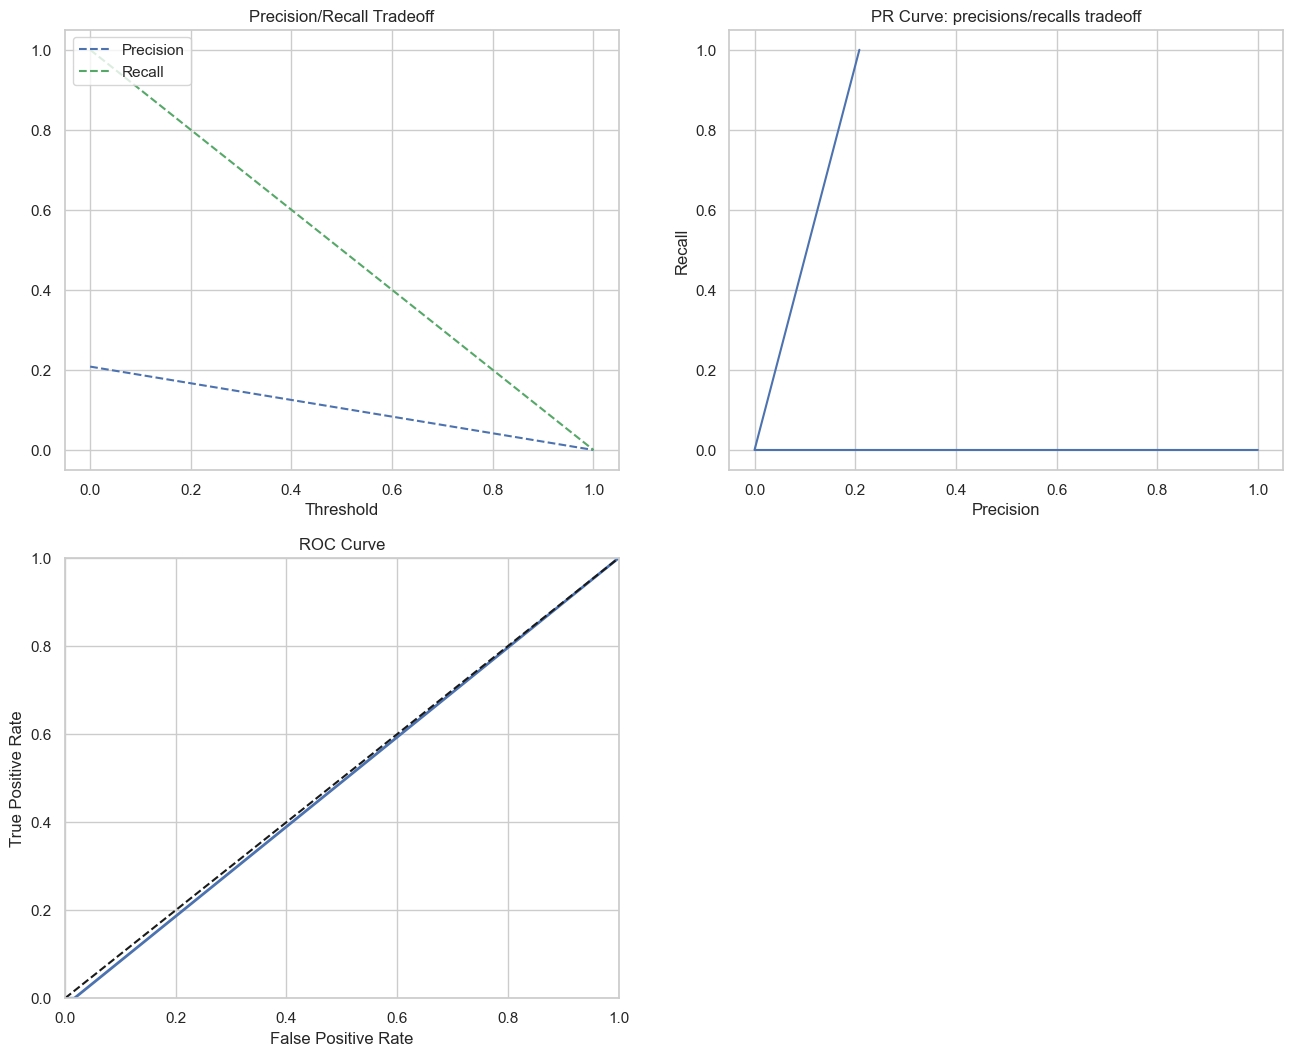

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, cb_clf.predict(X_test)),
    }

# ✔️ AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 292    0]]
ACCURACY SCORE:
0.7914
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.79   0.00      0.79       0.40          0.63
recall       1.00   0.00      0.79       0.50          0.79
f1-score     0.88   0.00      0.79       0.44          0.70
support   1108.00 292.00      0.79    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[475   0]
 [125   0]]
ACCURACY SCORE:
0.7917
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.79       0.40          0.63
recall      1.00   0.00      0.79       0.50          0.79
f1-score    0.88   0.00      0.79       0.44          0.70
support   475.00 125.00      0.79     600.00        600.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision

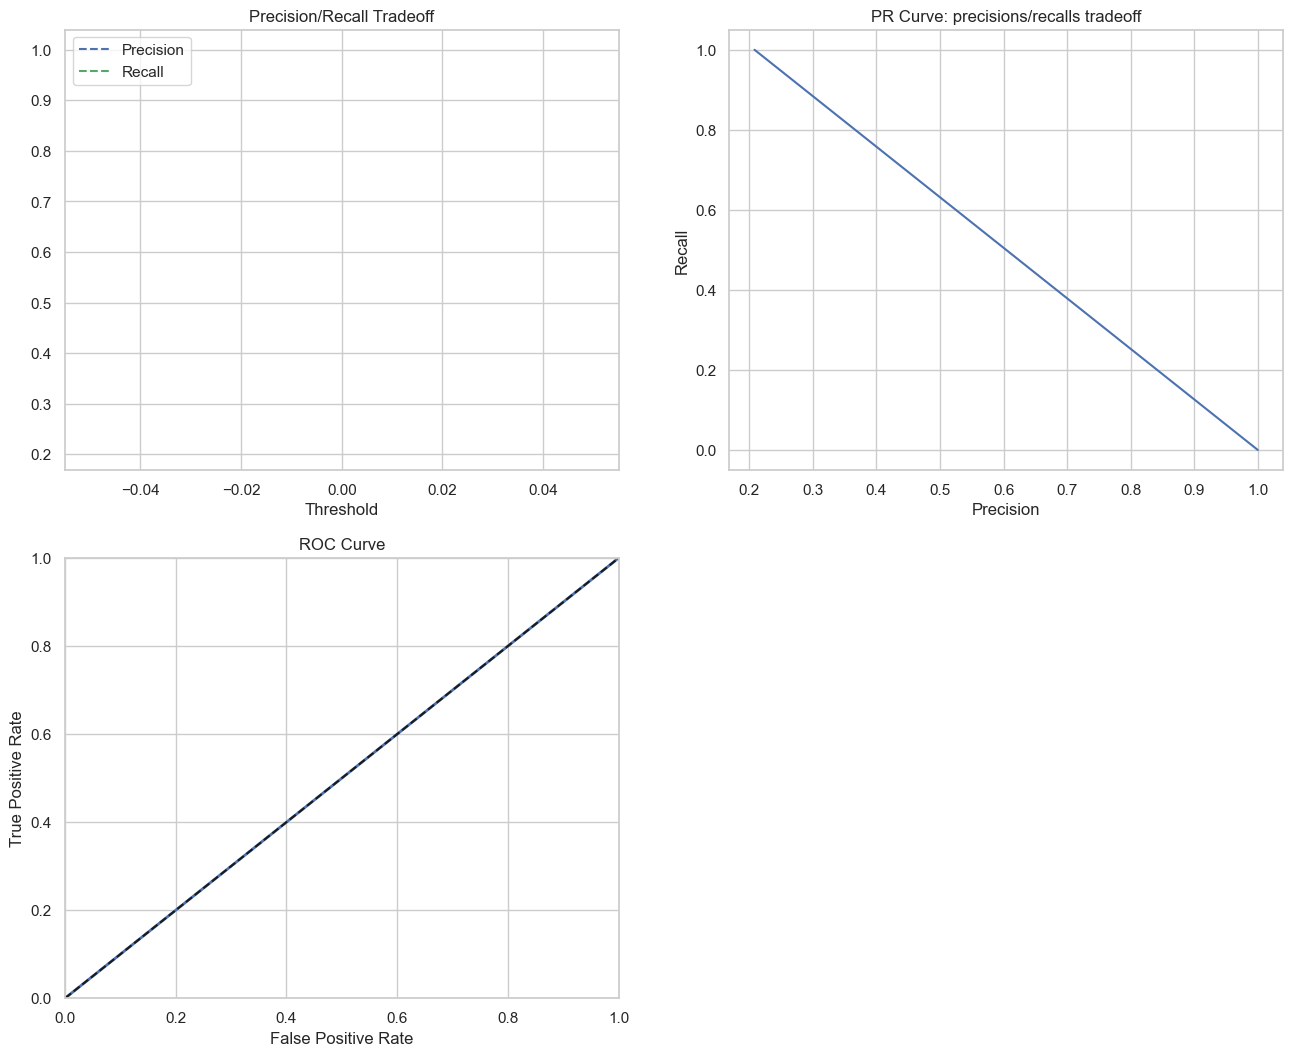

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),
    }

In [ ]:
ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.500
XGBOOST                        roc_auc_score: 0.481
LOGISTIC REGRESSION            roc_auc_score: 0.500
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500
LIGHTGBM                       roc_auc_score: 0.481
CATBOOST                       roc_auc_score: 0.492
ADABOOST                       roc_auc_score: 0.500


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
scores_df = pd.DataFrame(scores_dict)
# scores_df.plot(kind='barh', figsize=(15, 8))
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)

As observed above 'Salary' and 'Promotion_Last_3_Years' are the variables that influence the most to 'Attrition'

# Using KNN Imputer

In [ ]:
df1=pd.read_excel('HRTestData.xlsx')

In [ ]:
df1['Attrition']=df1['Attrition'].map({1:'Yes',0:'No'})
df1['Overtime']=df1['Overtime'].map({1:'Yes',0:'No'})
df1['Promotion_Last_3_Years']=df1['Promotion_Last_3_Years'].map({1:'Yes',0:'No'})

# Task 1: Exploratory Data Analysis (EDA)

## 1. Data Quality Check

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
import logging

# Configure logging for production
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def knn_impute_missing_values(df, n_neighbors=5):
    """
    Imputes missing values in a DataFrame using KNN Imputer.

    Parameters:
    - df (pd.DataFrame): The input DataFrame with missing values.
    - n_neighbors (int): The number of neighbors to use for KNN imputation. Default is 5.

    Returns:
    - pd.DataFrame: DataFrame with missing values imputed.
    """
    try:
        # Check for null values and log information
        if df.isnull().sum().sum() == 0:
            logging.info("No missing values found in the DataFrame.")
            return df

        # Selecting only numerical columns for KNN Imputer
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        logging.info(f"Applying KNN Imputer to the following columns: {list(numeric_cols)}")

        # Initialize KNN Imputer with specified neighbors
        imputer = KNNImputer(n_neighbors=n_neighbors)

        # Fit and transform only the numerical columns
        df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

        # Log completion
        logging.info("Missing values imputed successfully using KNN Imputer.")

    except Exception as e:
        logging.error(f"An error occurred during KNN Imputation: {str(e)}")
        raise

    return df

In [ ]:
KNN_df=knn_impute_missing_values(df1)

2024-11-15 11:55:56,318 - INFO - Applying KNN Imputer to the following columns: ['S.No', 'Employee_ID', 'Age', 'Tenure', 'Satisfaction_Score', 'Performance_Score', 'Salary', 'Work_Life_Balance']
2024-11-15 11:55:56,450 - INFO - Missing values imputed successfully using KNN Imputer.


In [ ]:
KNN_df

,S.No,Employee_ID,Age,Gender,Department,Tenure,Satisfaction_Score,Performance_Score,Salary,Attrition,Promotion_Last_3_Years,Work_Life_Balance,Overtime
0,0.00,1.00,30.00,Male,Engineering,7.92,8.00,2.00,92000.00,No,Yes,3.00,No
1,1.00,2.00,57.00,Female,Sales,14.30,6.00,2.00,54000.00,No,No,5.00,Yes
2,2.00,3.00,43.00,Male,Marketing,9.40,3.00,4.00,88000.00,No,No,3.00,No
3,3.00,4.00,47.00,Female,Marketing,0.50,1.00,1.00,106000.00,No,Yes,5.00,Yes
4,4.00,5.00,33.00,Male,Engineering,13.50,2.00,1.00,66000.00,No,No,2.00,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995.00,1996.00,29.00,Male,Sales,2.20,5.00,1.00,32000.00,No,No,2.00,Yes
1996,1996.00,1997.00,29.00,Male,Engineering,3.80,6.00,1.00,36000.00,No,No,5.00,No
1997,1997.00,1998.00,27.00,Female,HR,5.60,3.00,4.00,96000.00,Yes,No,5.00,No
1998,1998.00,1999.00,46.20,Male,Sales,11.50,4.00,2.00,59000.00,No,No,3.00,Yes


In [ ]:
KNN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S.No                    2000 non-null   float64
 1   Employee_ID             2000 non-null   float64
 2   Age                     2000 non-null   float64
 3   Gender                  2000 non-null   object 
 4   Department              2000 non-null   object 
 5   Tenure                  2000 non-null   float64
 6   Satisfaction_Score      2000 non-null   float64
 7   Performance_Score       2000 non-null   float64
 8   Salary                  2000 non-null   float64
 9   Attrition               2000 non-null   object 
 10  Promotion_Last_3_Years  2000 non-null   object 
 11  Work_Life_Balance       2000 non-null   float64
 12  Overtime                2000 non-null   object 
dtypes: float64(8), object(5)
memory usage: 203.3+ KB


In [ ]:
detect_outliers_iqr(KNN_df)

2024-11-15 11:55:56,503 - INFO - Checking for outliers in the following columns: ['S.No', 'Employee_ID', 'Age', 'Tenure', 'Satisfaction_Score', 'Performance_Score', 'Salary', 'Work_Life_Balance']
2024-11-15 11:55:56,508 - INFO - No outliers detected in column 'S.No'.
2024-11-15 11:55:56,513 - INFO - No outliers detected in column 'Employee_ID'.
2024-11-15 11:55:56,516 - INFO - No outliers detected in column 'Age'.
2024-11-15 11:55:56,520 - INFO - No outliers detected in column 'Tenure'.
2024-11-15 11:55:56,524 - INFO - No outliers detected in column 'Satisfaction_Score'.
2024-11-15 11:55:56,528 - INFO - No outliers detected in column 'Performance_Score'.
2024-11-15 11:55:56,534 - INFO - No outliers detected in column 'Salary'.
2024-11-15 11:55:56,540 - INFO - No outliers detected in column 'Work_Life_Balance'.


{}

In [ ]:
duplicates = KNN_df.duplicated()
duplicates.sum()

0

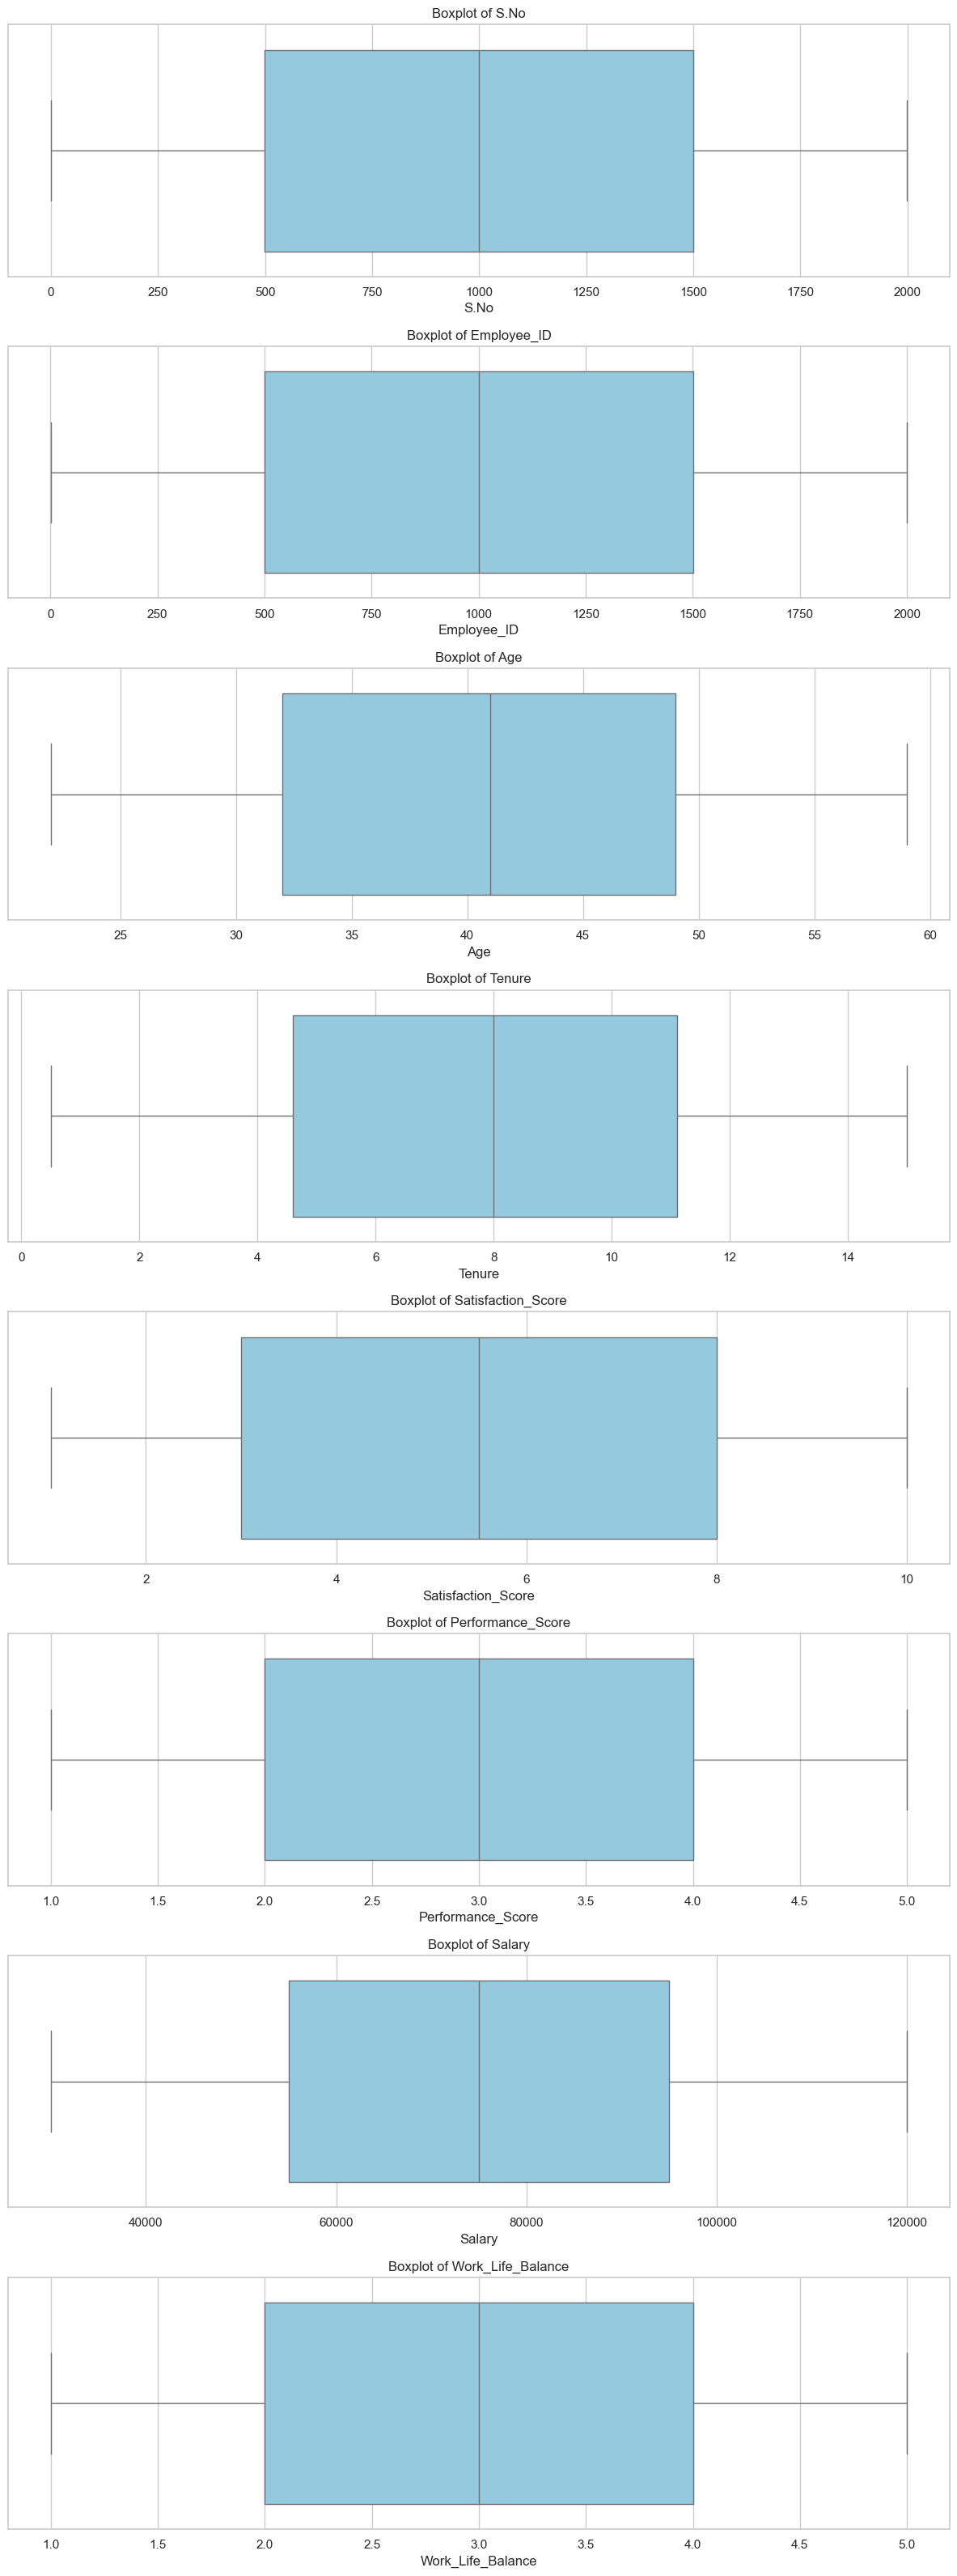

2024-11-15 11:55:57,509 - INFO - Boxplots generated successfully.


In [ ]:
plot_boxplots(KNN_df)

---
Justification for Handling Missing Values Using KNN Imputer
---

In this dataset, we chose to use KNN (K-Nearest Neighbors) imputation because it leverages the relationships between similar data points to estimate missing values, providing more context-aware and accurate imputations. For example, the missing Age for Employee_ID = 4 was imputed with 45.0 based on the values of similar employees, such as those from the Sales department. Similarly, the missing Performance_Score and Salary for Employee_ID = 5 were filled based on nearby records with comparable characteristics, ensuring the imputed values align more realistically with the overall dataset trends. KNN imputation captures the dependencies between features, which is particularly important in datasets with correlated variables, as it helps preserve the inherent relationships among them. This makes KNN a more suitable method compared to mean imputation, which can oversimplify the data and fail to maintain these relationships.






1. Dataset Characteristics: The dataset includes both numerical (e.g., Age, Salary) and categorical columns (e.g., Department, Attrition) with missing values in several key areas like Tenure, Satisfaction_Score, and Performance_Score. Proper imputation is essential to maintain data integrity for employee analysis.


2. Why KNN Imputer:

Multivariate Imputation: KNN considers multiple features, making it suitable for datasets where relationships between variables (e.g., Tenure and Performance_Score) are significant.

Pattern Retention: KNN imputes based on similarity, preserving relationships across both numerical and categorical data, unlike mean/median imputation, which can distort data patterns.



3. Implementation Details:

Encoding: Label encoding was applied to categorical columns for distance calculation, as KNN requires numerical inputs.

Parameter Choice (k=2): A value of k=2 balances accuracy and efficiency, drawing from two similar records to estimate missing values without excessive smoothing.




4. Outcome: KNN imputation fills missing values based on real data patterns, supporting a more accurate and interpretable dataset for downstream analysis or modeling.

---

# 2. Statistical Summary

In [ ]:
# Function for Statistical Summary of Numerical Columns
numerical_summary(KNN_df)

Numerical Summary:
          S.No  Employee_ID     Age  Tenure  Satisfaction_Score  \
count 2000.00      2000.00 2000.00 2000.00             2000.00   
mean   999.50      1000.50   40.81    7.87                5.55   
std    577.49       577.49   10.46    4.00                2.75   
min      0.00         1.00   22.00    0.50                1.00   
25%    499.75       500.75   32.00    4.60                3.00   
50%    999.50      1000.50   41.00    8.00                5.50   
75%   1499.25      1500.25   49.00   11.11                8.00   
max   1999.00      2000.00   59.00   15.00               10.00   

       Performance_Score    Salary  Work_Life_Balance  
count            2000.00   2000.00            2000.00  
mean                2.99  75030.00               3.06  
std                 1.41  24756.99               1.43  
min                 1.00  30000.00               1.00  
25%                 2.00  55000.00               2.00  
50%                 3.00  75000.00               

In [ ]:
# Function for Categorical Summary
categorical_summary(KNN_df)

Categorical Summary:
        Gender Department Attrition Promotion_Last_3_Years Overtime
count    2000       2000      2000                   2000     2000
unique      2          5         2                      2        2
top      Male      Sales        No                     No       No
freq     1010        464      1583                   1726     1402


# 3.Data Visualization

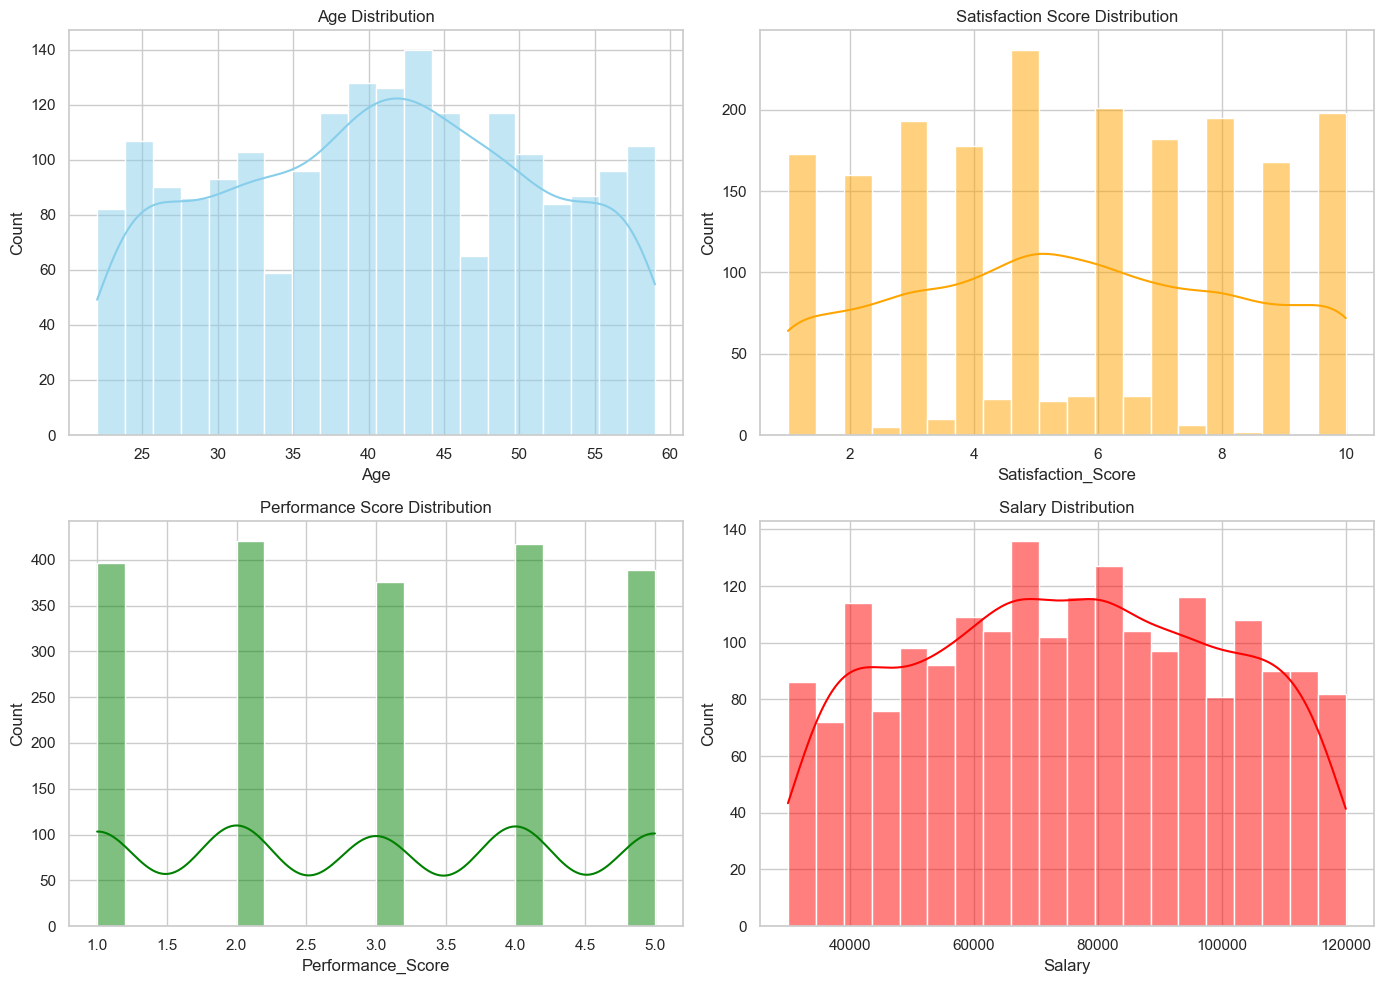

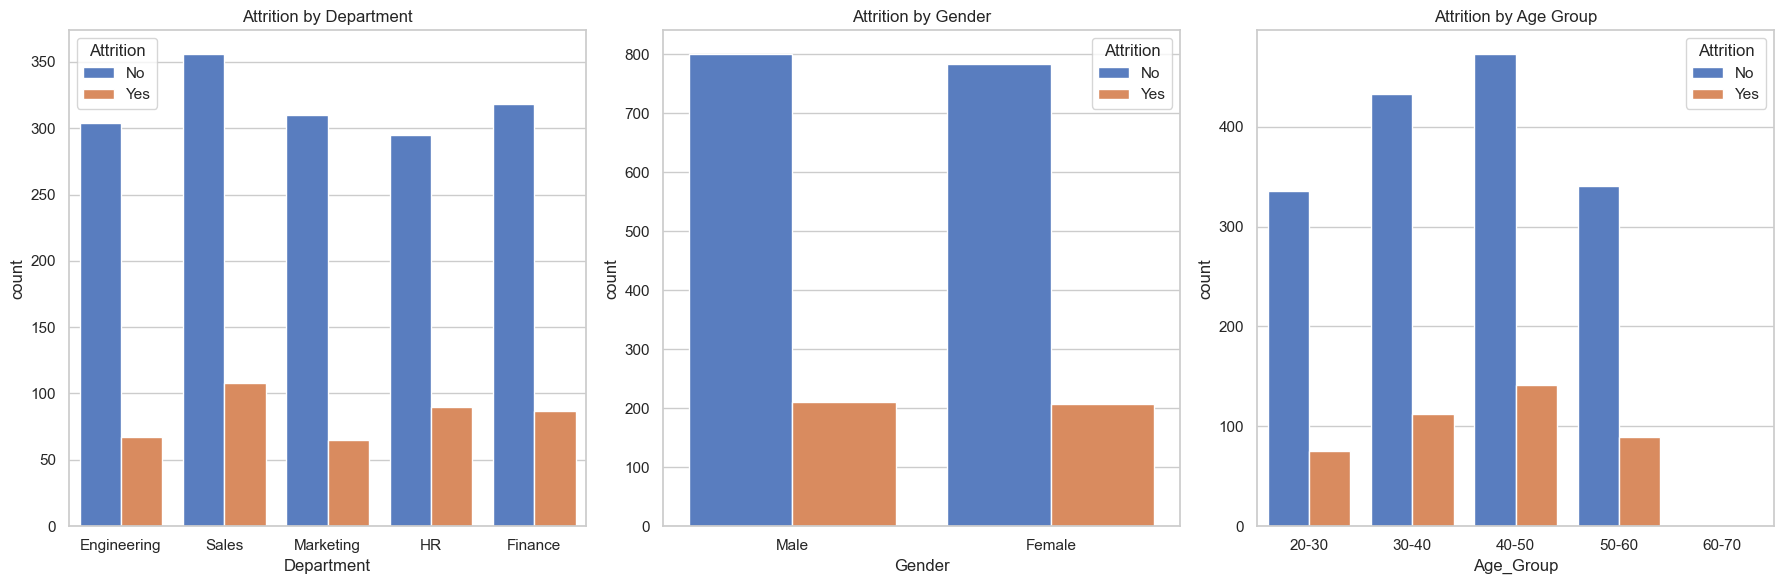

In [ ]:
visualize_employee_data(KNN_df)

# Task 2: Statistical Analysis

### 1. Hypothesis Testing:

In [ ]:
test_satisfaction_by_promotion(KNN_df)

Hypothesis 1: T-test between promoted and non-promoted employees
T-statistic: -0.017480308212244087, P-value: 0.9860551875283574
Conclusion: There is no significant difference in satisfaction scores between promoted and non-promoted employees.


In [ ]:
test_performance_by_department(KNN_df)


Hypothesis 2: ANOVA test across departments
F-statistic: 0.3392025711601992, P-value: 0.8516281612463317
Conclusion: There is no significant difference in performance scores across departments.


### 2. Correlation Analysis:


Correlation Matrix:
                    Satisfaction_Score  Performance_Score  Tenure  Salary
Satisfaction_Score                1.00               0.01   -0.03    0.02
Performance_Score                 0.01               1.00    0.00   -0.00
Tenure                           -0.03               0.00    1.00   -0.00
Salary                            0.02              -0.00   -0.00    1.00


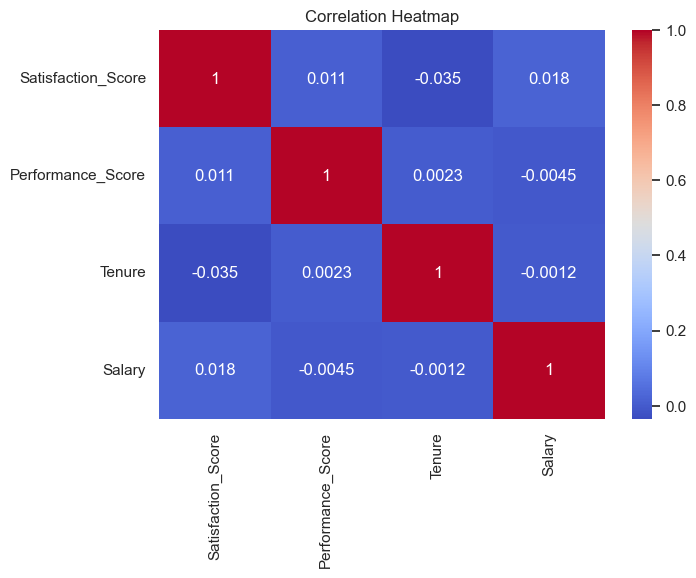

In [ ]:
correlation_matrix = KNN_df[['Satisfaction_Score', 'Performance_Score', 'Tenure', 'Salary']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
# Plotting the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 2. Correlation Analysis
# Calculate the correlation matrix between Satisfaction_Score, Performance_Score, Tenure, and Salary
correlation_matrix = KNN_df[['Satisfaction_Score', 'Performance_Score', 'Tenure', 'Salary']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
# Interpretation
#print("\nInterpretation:")
if correlation_matrix['Satisfaction_Score']['Performance_Score'] > 0.5:
    print("- There is a strong positive correlation between Satisfaction_Score and Performance_Score.")
if correlation_matrix['Satisfaction_Score']['Tenure'] < -0.3:
    print("- There is a moderate negative correlation between Satisfaction_Score and Tenure.")
if correlation_matrix['Satisfaction_Score']['Salary'] > 0.4:
    print("- There is a moderate positive correlation between Satisfaction_Score and Salary.")
if correlation_matrix['Performance_Score']['Salary'] > 0.6:
    print("- Performance score and Salary have a moderate positive correlation.")


Correlation Matrix:
                    Satisfaction_Score  Performance_Score  Tenure  Salary
Satisfaction_Score                1.00               0.01   -0.03    0.02
Performance_Score                 0.01               1.00    0.00   -0.00
Tenure                           -0.03               0.00    1.00   -0.00
Salary                            0.02              -0.00   -0.00    1.00


# Task 3: Regression Analysis

In [ ]:
importance_KNN_df = feature_importance(KNN_df, continuous_cols, categorical_cols, target_col)
print(importance_KNN_df)

                                                    Stat_Value  P_Value
ANOVA - Age with Attrition                                1.05     0.31
ANOVA - Tenure with Attrition                             0.02     0.90
ANOVA - Satisfaction_Score with Attrition                 0.36     0.55
ANOVA - Performance_Score with Attrition                  0.96     0.33
ANOVA - Salary with Attrition                             2.90     0.09
Chi-square - Gender with Attrition                        0.00     0.99
Chi-square - Department with Attrition                    7.80     0.10
Chi-square - Promotion_Last_3_Years with Attrition        1.04     0.31
Chi-square - Work_Life_Balance with Attrition             1.33     0.86
Chi-square - Overtime with Attrition                      0.21     0.65
Chi-square - Age_Group with Attrition                     3.38     0.34


In [ ]:
# For columns like 'Gender' or any ordinal categorical variable
KNN_df['Gender'] = label_encoder.fit_transform(KNN_df['Gender'])

# You can do the same for other columns
KNN_df['Department'] = label_encoder.fit_transform(KNN_df['Department'])

KNN_df['Promotion_Last_3_Years'] = label_encoder.fit_transform(KNN_df['Promotion_Last_3_Years'])

KNN_df['Overtime'] = label_encoder.fit_transform(KNN_df['Overtime'])

KNN_df['Attrition'] = label_encoder.fit_transform(KNN_df['Attrition'])

In [ ]:
KNN_df

,S.No,Employee_ID,Age,Gender,Department,Tenure,Satisfaction_Score,Performance_Score,Salary,Attrition,Promotion_Last_3_Years,Work_Life_Balance,Overtime,Age_Group
0,0.00,1.00,30.00,1,0,7.92,8.00,2.00,92000.00,0,1,3.00,0,20-30
1,1.00,2.00,57.00,0,4,14.30,6.00,2.00,54000.00,0,0,5.00,1,50-60
2,2.00,3.00,43.00,1,3,9.40,3.00,4.00,88000.00,0,0,3.00,0,40-50
3,3.00,4.00,47.00,0,3,0.50,1.00,1.00,106000.00,0,1,5.00,1,40-50
4,4.00,5.00,33.00,1,0,13.50,2.00,1.00,66000.00,0,0,2.00,1,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995.00,1996.00,29.00,1,4,2.20,5.00,1.00,32000.00,0,0,2.00,1,20-30
1996,1996.00,1997.00,29.00,1,0,3.80,6.00,1.00,36000.00,0,0,5.00,0,20-30
1997,1997.00,1998.00,27.00,0,2,5.60,3.00,4.00,96000.00,1,0,5.00,0,20-30
1998,1998.00,1999.00,46.20,1,4,11.50,4.00,2.00,59000.00,0,0,3.00,1,40-50


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
X = KNN_df.drop(['Attrition','S.No','Age_Group','Employee_ID'], axis=1)
y = KNN_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
y_test.value_counts()[0] / y_test.shape[0]

0.7916666666666666

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 79.14%
Leaving Rate: 20.86%
===============TEST=================
Staying Rate: 79.17%
Leaving Rate: 20.83%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)
evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 292    0]]
ACCURACY SCORE:
0.7914
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.79   0.00      0.79       0.40          0.63
recall       1.00   0.00      0.79       0.50          0.79
f1-score     0.88   0.00      0.79       0.44          0.70
support   1108.00 292.00      0.79    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[475   0]
 [125   0]]
ACCURACY SCORE:
0.7917
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.79       0.40          0.63
recall      1.00   0.00      0.79       0.50          0.79
f1-score    0.88   0.00      0.79       0.44          0.70
support   475.00 125.00      0.79     600.00        600.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\s

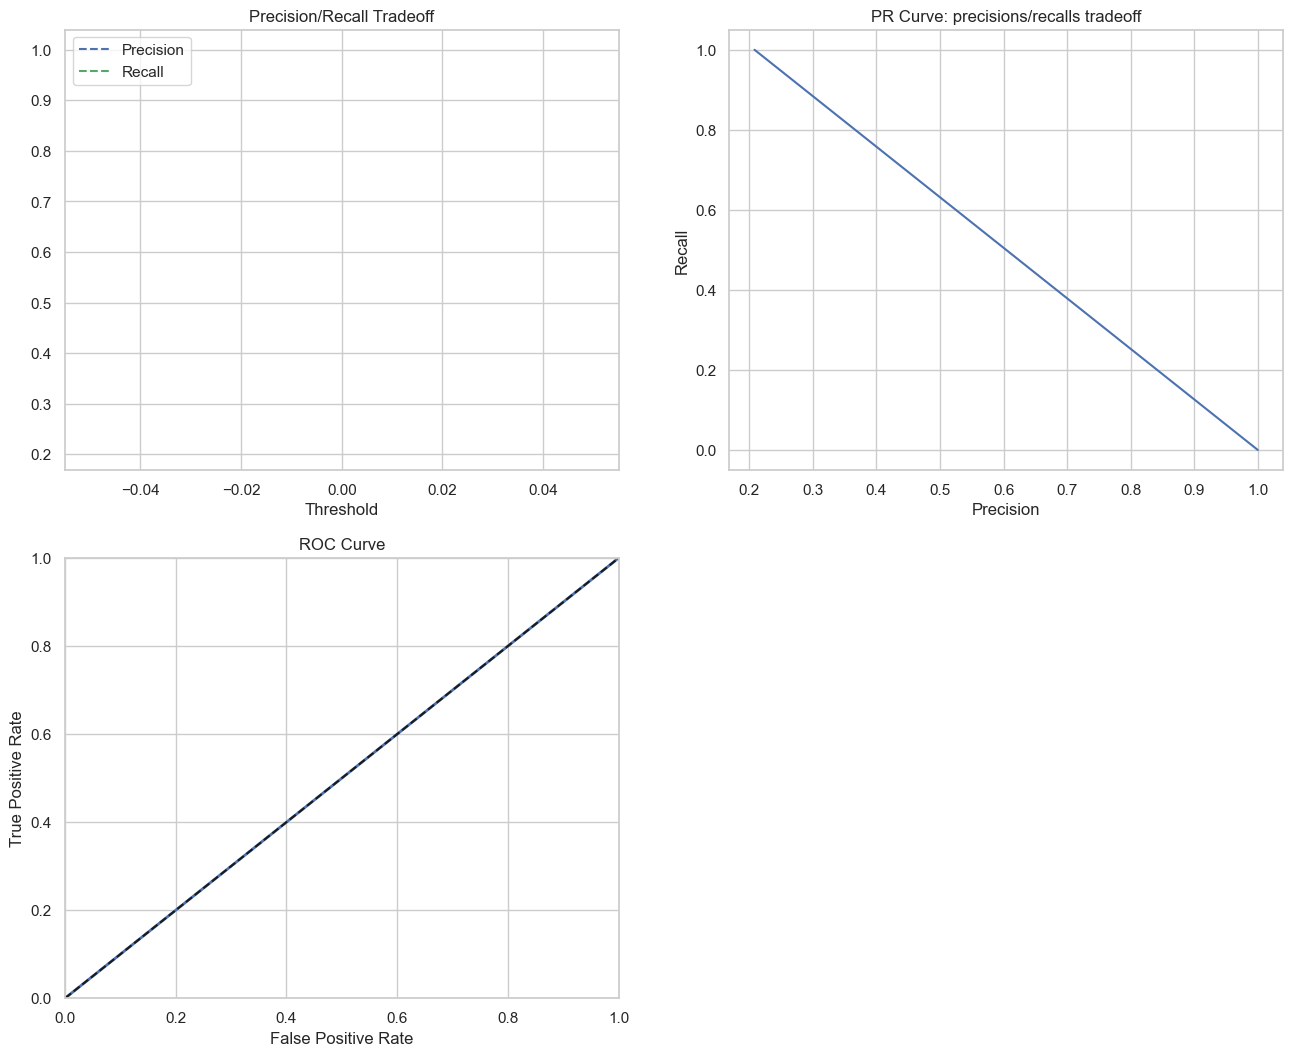

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# XGBoost CLassifier

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [   0  292]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    1.00   1.00      1.00       1.00          1.00
recall       1.00   1.00      1.00       1.00          1.00
f1-score     1.00   1.00      1.00       1.00          1.00
support   1108.00 292.00      1.00    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[430  45]
 [118   7]]
ACCURACY SCORE:
0.7283
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.78   0.13      0.73       0.46          0.65
recall      0.91   0.06      0.73       0.48          0.73
f1-score    0.84   0.08      0.73       0.46          0.68
support   475.00 125.00      0.73     600.00        600.00


In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

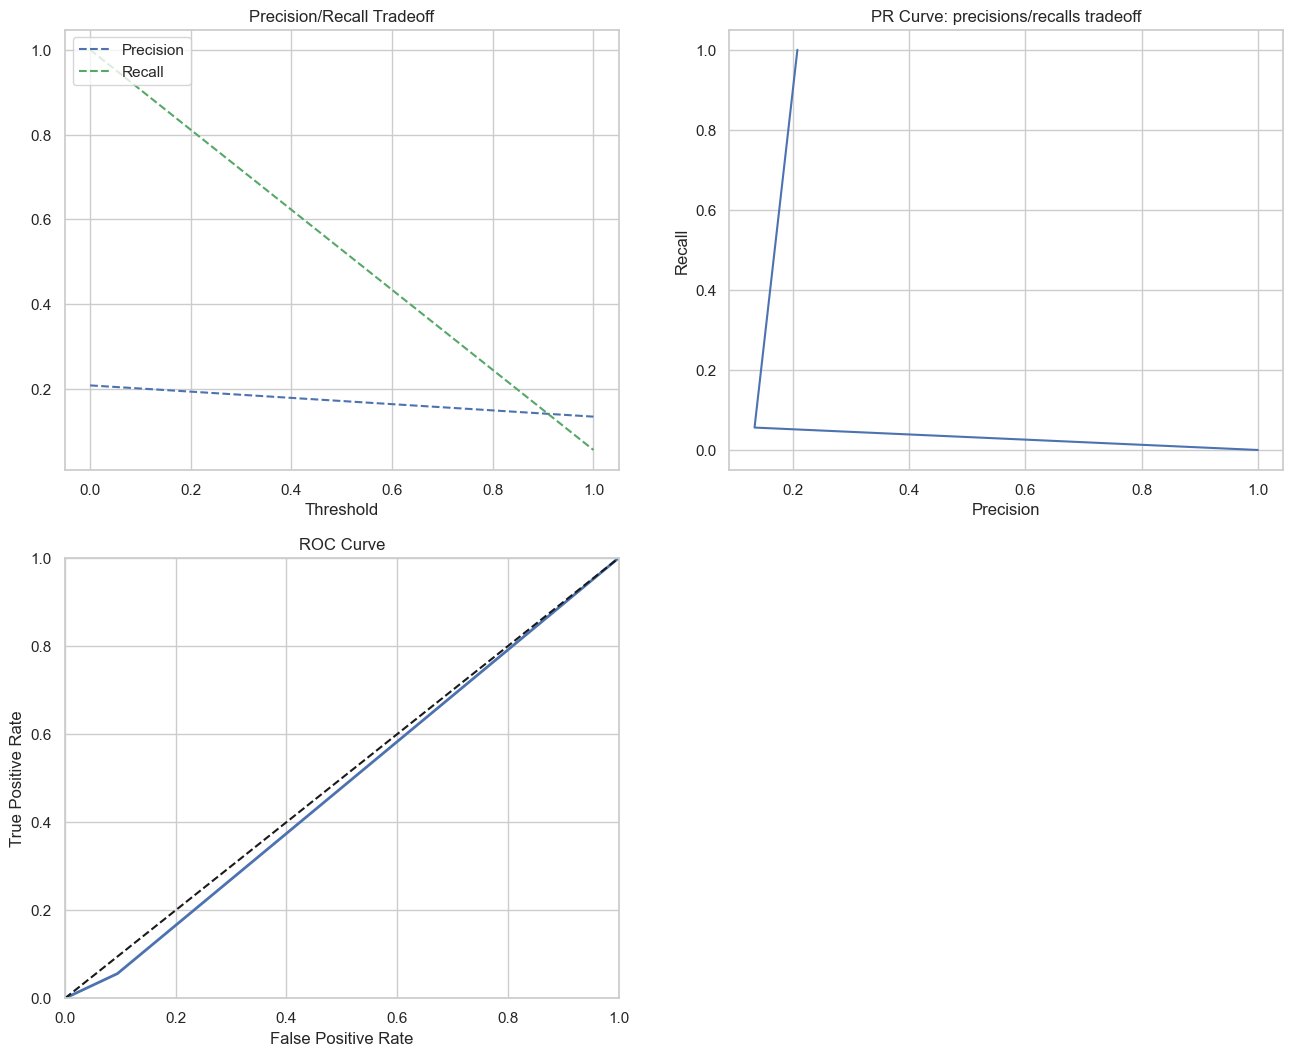

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)
plt.show()

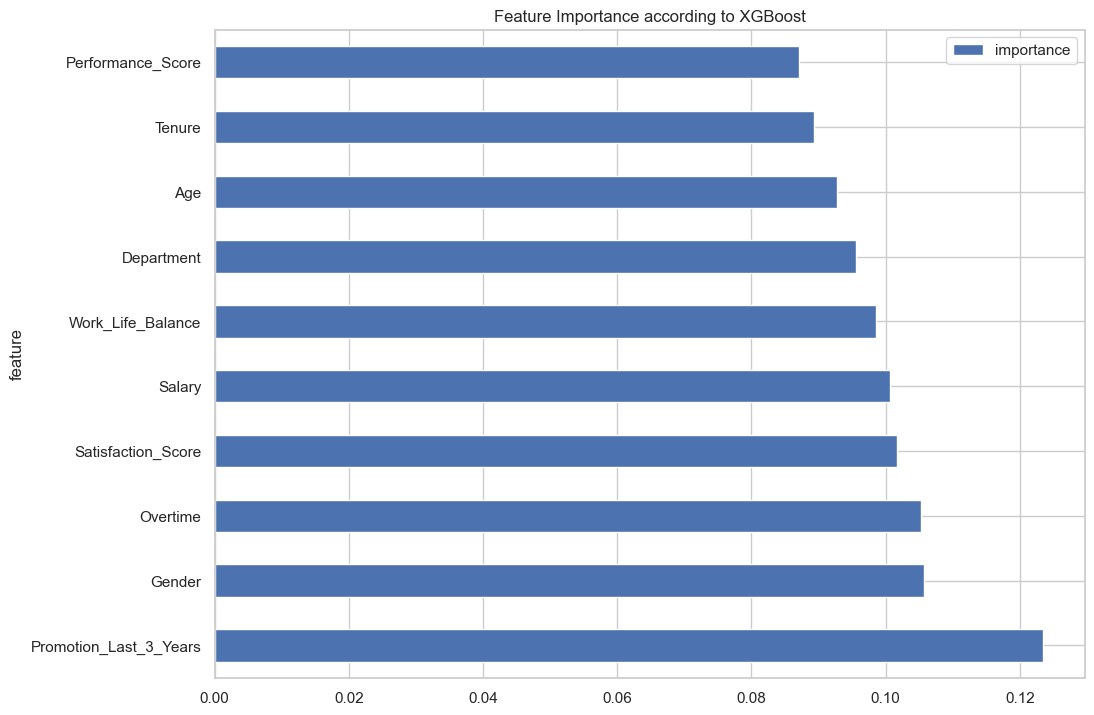

In [ ]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')
plt.show()

# LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 292, number of negative: 1108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208571 -> initscore=-1.333558
[LightGBM] [Info] Start training from score -1.333558
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [  19  273]]
ACCURACY SCORE:
0.9864
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.98   1.00      0.99       0.99          0.99
recall       1.00   0.93      0.99       0.97          0.99
f1-score     0.99   0.97      0.99       0.98          0.99
support   1108.00 292.00      0.99    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[445  30]
 [119   6]]
ACCURACY SCORE:
0.7517
CLASSIFICATION REPOR

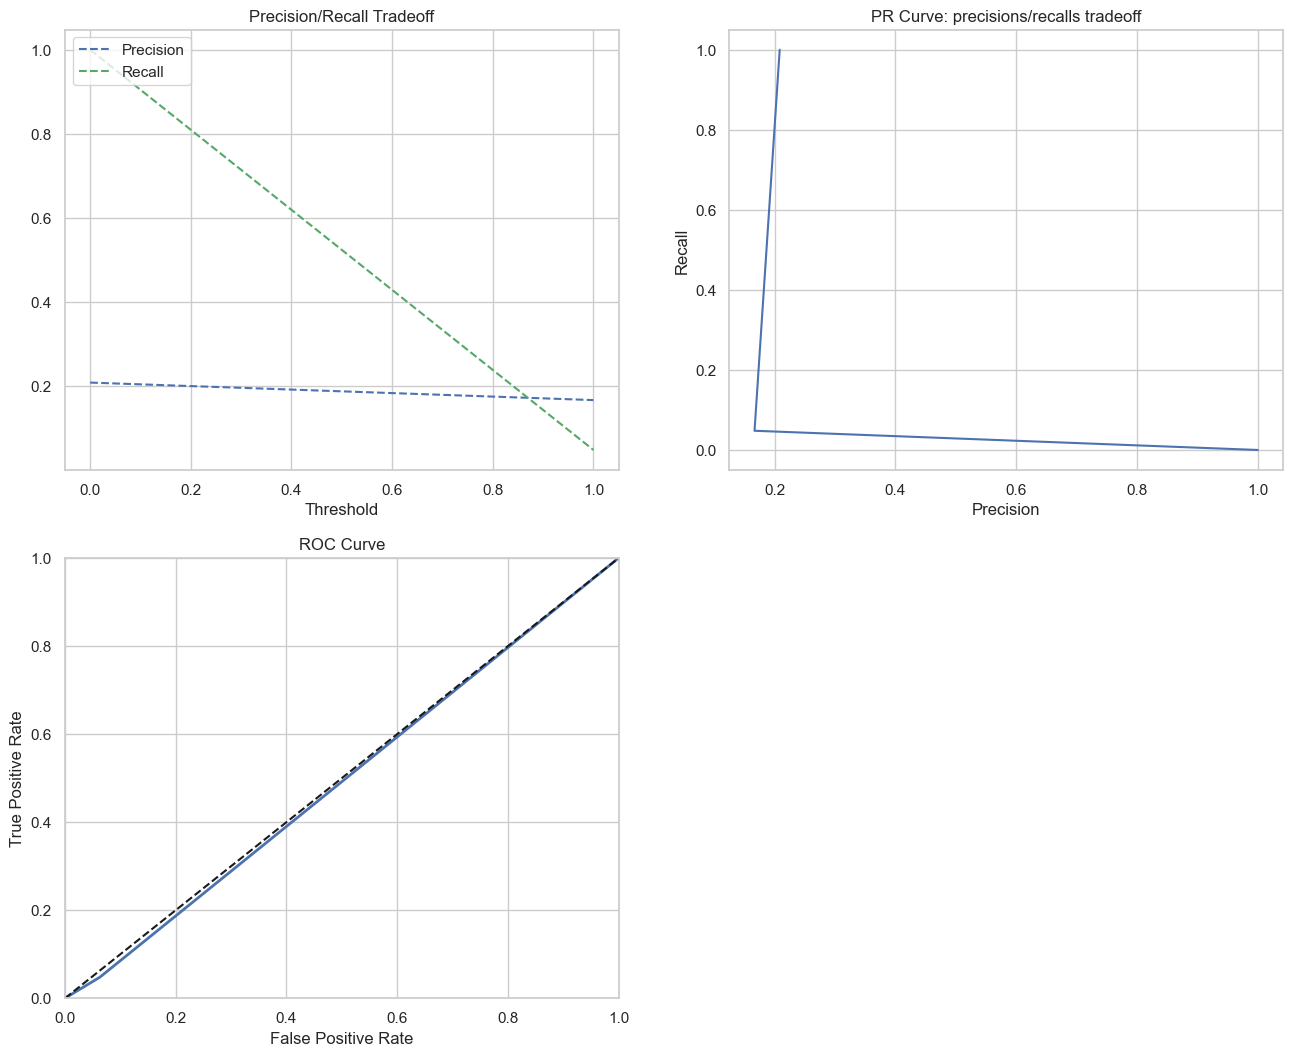

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)
plt.show()

# CatBoostClassifier

In [ ]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 152  140]]
ACCURACY SCORE:
0.8914
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.88   1.00      0.89       0.94          0.90
recall       1.00   0.48      0.89       0.74          0.89
f1-score     0.94   0.65      0.89       0.79          0.88
support   1108.00 292.00      0.89    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[468   7]
 [125   0]]
ACCURACY SCORE:
0.7800
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.78       0.39          0.62
recall      0.99   0.00      0.78       0.49          0.78
f1-score    0.88   0.00      0.78       0.44          0.69
support   475.00 125.00      0.78     600.00        600.00


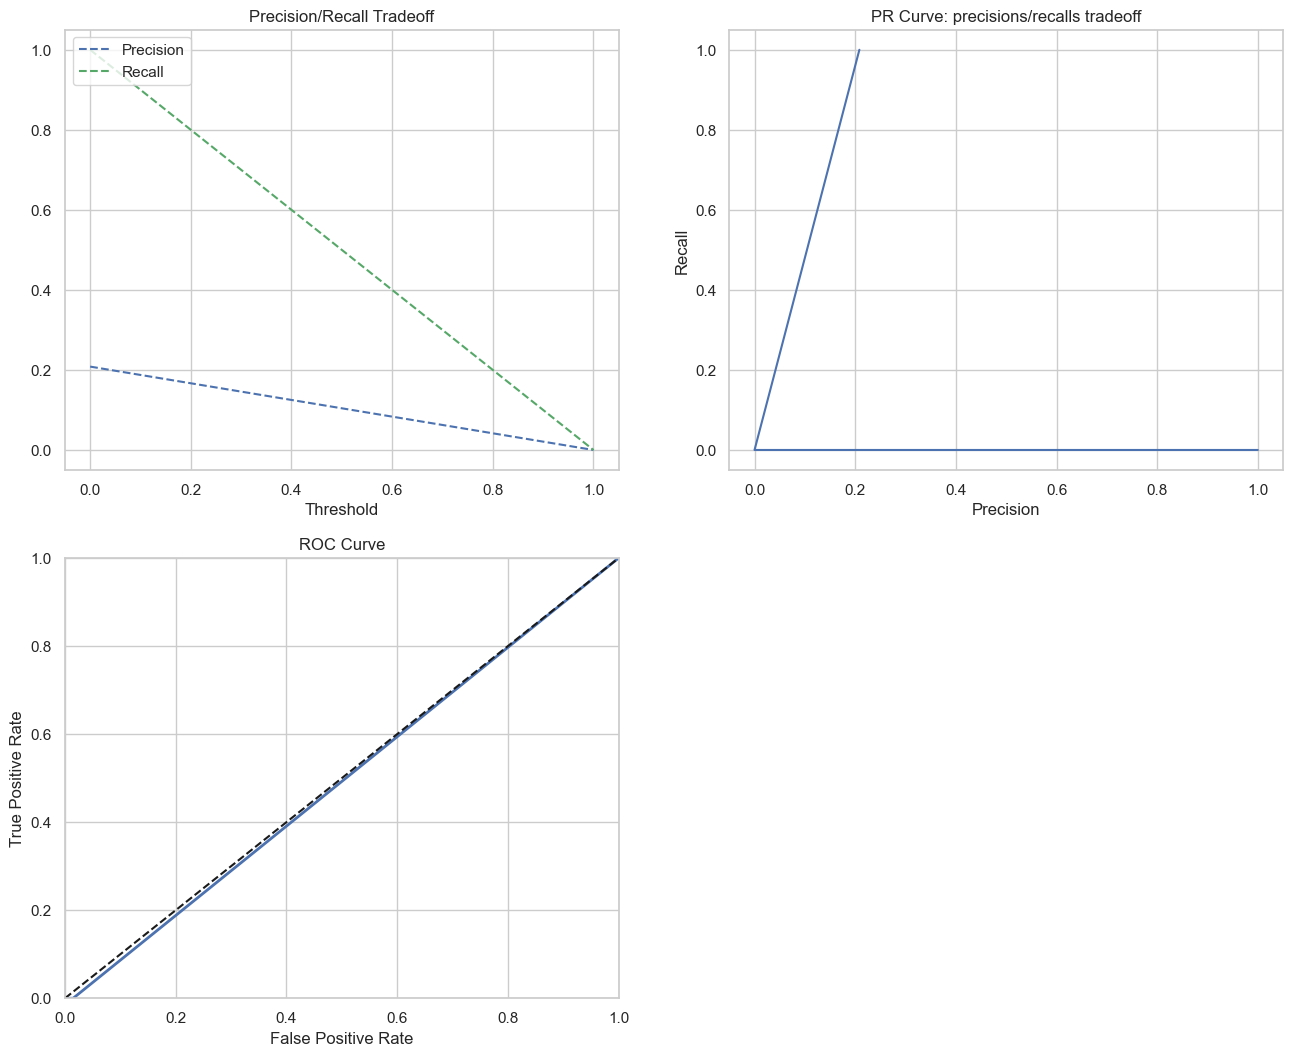

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, cb_clf.predict(X_test)),
    }

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 292    0]]
ACCURACY SCORE:
0.7914
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.79   0.00      0.79       0.40          0.63
recall       1.00   0.00      0.79       0.50          0.79
f1-score     0.88   0.00      0.79       0.44          0.70
support   1108.00 292.00      0.79    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[474   1]
 [125   0]]
ACCURACY SCORE:
0.7900
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.79       0.40          0.63
recall      1.00   0.00      0.79       0.50          0.79
f1-score    0.88   0.00      0.79       0.44          0.70
support   475.00 125.00      0.79     600.00        600.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


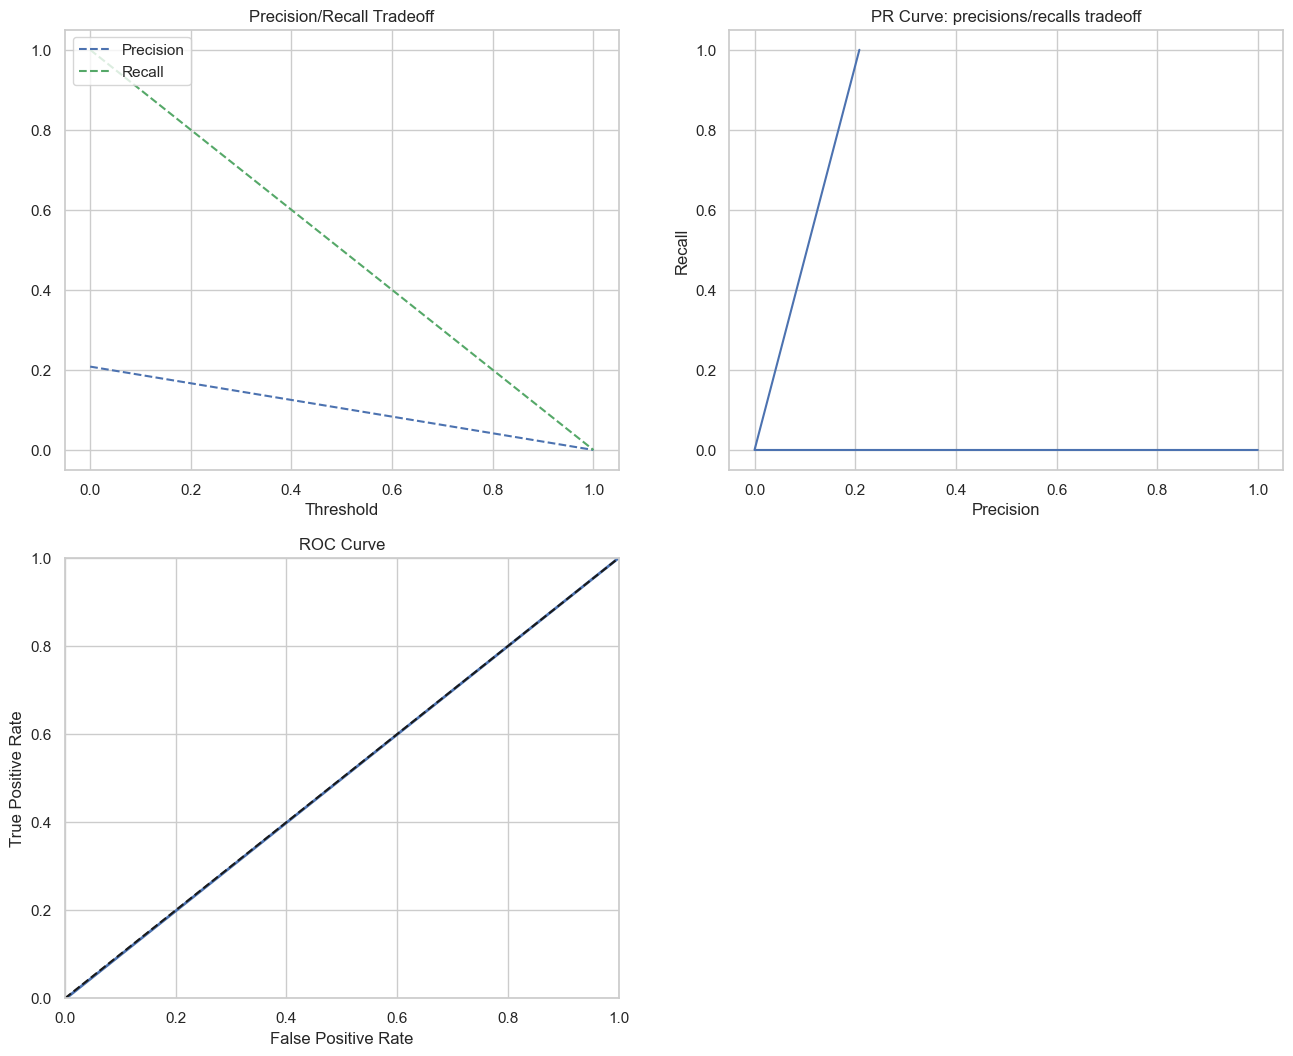

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),
    }

# Random forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [   0  292]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    1.00   1.00      1.00       1.00          1.00
recall       1.00   1.00      1.00       1.00          1.00
f1-score     1.00   1.00      1.00       1.00          1.00
support   1108.00 292.00      1.00    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[463  12]
 [123   2]]
ACCURACY SCORE:
0.7750
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.14      0.78       0.47          0.66
recall      0.97   0.02      0.78       0.50          0.78
f1-score    0.87   0.03      0.78       0.45          0.70
support   475.00 125.00      0.78     600.00        600.00


In [ ]:
param_grid = dict(
    n_estimators= [100, 500, 900],
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4],
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
822 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [   0  292]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    1.00   1.00      1.00       1.00          1.00
recall       1.00   1.00      1.00       1.00          1.00
f1-score     1.00   1.00      1.00       1.00          1.00
support   1108.00 292.00      1.00    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[462  13]
 [120   5]]
ACCURACY SCORE:
0.7783
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.28      0.78       0.54          0.69
recall      0.97   0.04      0.78       0.51          0.78
f1-score    0.87   0.07      0.78       0.47          0.71
support   475.00 125.00      0.78     600.00        600.00


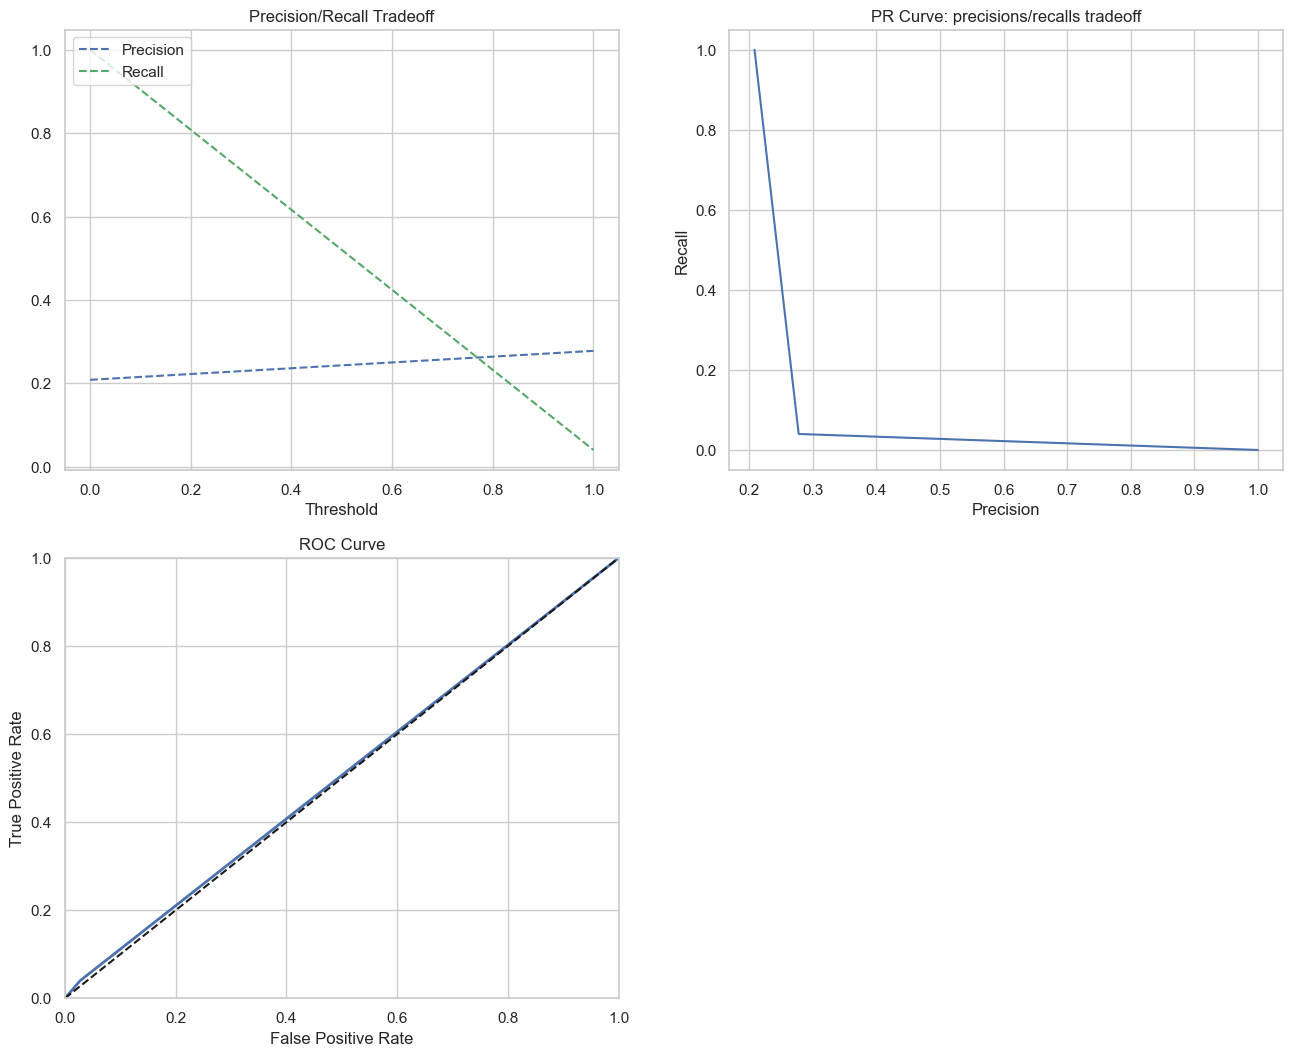

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

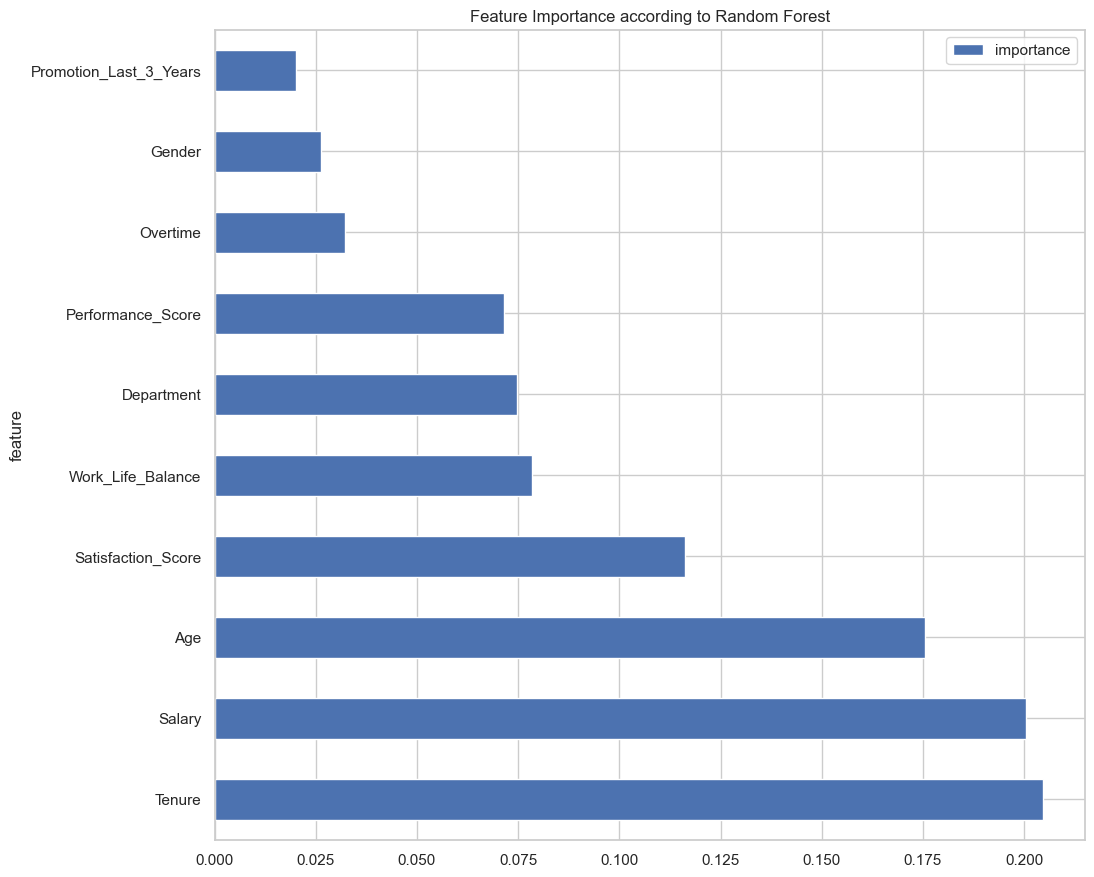

In [ ]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')
plt.show()

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 292    0]]
ACCURACY SCORE:
0.7914
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.79   0.00      0.79       0.40          0.63
recall       1.00   0.00      0.79       0.50          0.79
f1-score     0.88   0.00      0.79       0.44          0.70
support   1108.00 292.00      0.79    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[475   0]
 [125   0]]
ACCURACY SCORE:
0.7917
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.79       0.40          0.63
recall      1.00   0.00      0.79       0.50          0.79
f1-score    0.88   0.00      0.79       0.44          0.70
support   475.00 125.00      0.79     600.00        600.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\s

In [ ]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [ ]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1108    0]
 [ 292    0]]
ACCURACY SCORE:
0.7914
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.79   0.00      0.79       0.40          0.63
recall       1.00   0.00      0.79       0.50          0.79
f1-score     0.88   0.00      0.79       0.44          0.70
support   1108.00 292.00      0.79    1400.00       1400.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[475   0]
 [125   0]]
ACCURACY SCORE:
0.7917
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.00      0.79       0.40          0.63
recall      1.00   0.00      0.79       0.50          0.79
f1-score    0.88   0.00      0.79       0.44          0.70
support   475.00 125.00      0.79     600.00        600.00


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\s

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

In [ ]:
KNN_ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf
}

for model in KNN_ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, KNN_ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.506
XGBOOST                        roc_auc_score: 0.481
LOGISTIC REGRESSION            roc_auc_score: 0.500
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


LIGHTGBM                       roc_auc_score: 0.492
CATBOOST                       roc_auc_score: 0.493
ADABOOST                       roc_auc_score: 0.499


As we can observe, the accuracy is increase by 1% after applying KNN on some models